<a href="https://colab.research.google.com/github/disini-thev/DSA-LAB-6/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **GAN on MNIST – Generator, Discriminator, and Fake Dataset Creation**

This notebook demonstrates training a Generative Adversarial Network (GAN) on the MNIST handwritten digits dataset.
The workflow includes:

* Building and training a generator and a discriminator.
* Saving the trained models for later use.
* Using the generator to create a synthetic dataset of 100 images (10 images per digit class).
* Assigning labels to the generated samples for further experimentation.

The purpose of this project is to explore how GANs can be applied to generate realistic handwritten digits and to create a small labeled dataset for testing and downstream tasks.

## GAN

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
#for reproducibility
torch.manual_seed(42)
np.random.seed(42)

In [ ]:
batch_size = 100
z_dim = 100
image_size = 28

learning_rate = 0.0002
image_channels = 1
n_epochs = 100

Using the torchvision.datasets to load MNIST dataset

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)), #range of pixel values from [0,1] to [-1,1]
])

mnist_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transform,
                               download=True)

data_loader = DataLoader(dataset=mnist_dataset,
                         batch_size=batch_size,
                         shuffle=True)

Using MNIST dataset in the raw binary format

In [ ]:
#!pip install idx2numpy

In [ ]:
# import torch
# from torch.utils.data import DataLoader, TensorDataset
# import idx2numpy
# import numpy as np

# # Paths to your ubyte files
# train_images_path = "data/mnist/train-images.idx3-ubyte"
# train_labels_path = "data/mnist/train-labels.idx1-ubyte"

# # Load using idx2numpy
# train_images = idx2numpy.convert_from_file(train_images_path)  # shape (60000, 28, 28)
# train_labels = idx2numpy.convert_from_file(train_labels_path)  # shape (60000,)

# # Normalize images to [-1, 1]
# train_images = train_images.astype(np.float32) / 255.0
# train_images = (train_images - 0.5) / 0.5  # normalize to [-1, 1]

# # Convert to torch tensors
# train_images_tensor = torch.tensor(train_images).unsqueeze(1)  # shape: (N, 1, 28, 28)
# train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)

# # Create TensorDataset and DataLoader
# train_dataset = TensorDataset(train_images_tensor, train_labels_tensor)
# data_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


In [ ]:
#ConvTranspose2d (# input channels, # output channels, kernel size, stride, padding)
#BatchNorm2d (size of the feature map)

# Generator
class Generator(nn.Module):
  def __init__(self):
    super(Generator, self).__init__()
    self.model = nn.Sequential(
        nn.ConvTranspose2d(z_dim,256,7,1,0), #strided convolution
        nn.BatchNorm2d(256), # mean=0, variance=1
        nn.ReLU(inplace = True),  #adds non linearity
        nn.ConvTranspose2d(256,128,4,2,1),   #(256,7,7) --> (128,14,14)
        nn.BatchNorm2d(128),
        nn.ReLU(inplace=True),
        nn.ConvTranspose2d(128,1,4,2,1), #(14x14 --> 28x28)
        nn.Tanh()
    )

  def forward(self, z):
    return self.model(z)


In [ ]:
#Conv2d(#image channels, #output channels, kernel size, stride, padding)

#Descriminator
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(1,128,4,2,1),
        nn.LeakyReLU(0.2, inplace=True), #small non zero gradient when input is negative
        nn.Conv2d(128,256,4,2,1),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Conv2d(256,1,7,1,0),
        nn.Sigmoid()
    )

  def forward(self,x):
    return self.model(x)

In [ ]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)

In [ ]:
loss_function = nn.BCELoss() #Binary Cross Entropy Loss
optimizer_g = torch.optim.Adam(generator.parameters(), lr = learning_rate)
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr= learning_rate)

Epoch [1/100], Batch [100/600], D_real: 0.9982, D_fake: 0.0007, Loss_D: 0.0025, Loss_G: 7.4603
Epoch [1/100], Batch [200/600], D_real: 0.9997, D_fake: 0.0004, Loss_D: 0.0008, Loss_G: 7.9032
Epoch [1/100], Batch [300/600], D_real: 0.9981, D_fake: 0.0045, Loss_D: 0.0064, Loss_G: 5.8491
Epoch [1/100], Batch [400/600], D_real: 1.0000, D_fake: 0.0002, Loss_D: 0.0002, Loss_G: 9.1501
Epoch [1/100], Batch [500/600], D_real: 0.9997, D_fake: 0.0005, Loss_D: 0.0008, Loss_G: 8.3809
Epoch [1/100], Batch [600/600], D_real: 0.9998, D_fake: 0.0037, Loss_D: 0.0039, Loss_G: 6.4398


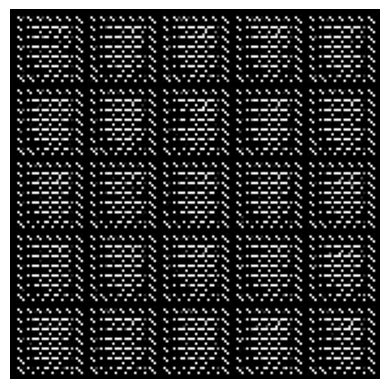

Epoch [2/100], Batch [100/600], D_real: 0.9998, D_fake: 0.0001, Loss_D: 0.0002, Loss_G: 9.4661
Epoch [2/100], Batch [200/600], D_real: 0.9998, D_fake: 0.0024, Loss_D: 0.0026, Loss_G: 7.2248
Epoch [2/100], Batch [300/600], D_real: 0.9998, D_fake: 0.0002, Loss_D: 0.0004, Loss_G: 8.8676
Epoch [2/100], Batch [400/600], D_real: 0.9999, D_fake: 0.0001, Loss_D: 0.0002, Loss_G: 9.4859
Epoch [2/100], Batch [500/600], D_real: 0.9999, D_fake: 0.0001, Loss_D: 0.0001, Loss_G: 9.9564
Epoch [2/100], Batch [600/600], D_real: 0.9676, D_fake: 0.0000, Loss_D: 0.0450, Loss_G: 19.9375


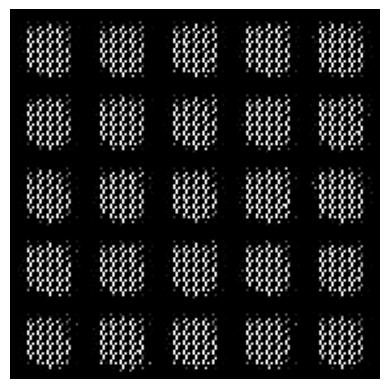

Epoch [3/100], Batch [100/600], D_real: 0.9998, D_fake: 0.0000, Loss_D: 0.0003, Loss_G: 10.2110
Epoch [3/100], Batch [200/600], D_real: 0.9998, D_fake: 0.0000, Loss_D: 0.0002, Loss_G: 12.0187
Epoch [3/100], Batch [300/600], D_real: 1.0000, D_fake: 0.0007, Loss_D: 0.0008, Loss_G: 7.4637
Epoch [3/100], Batch [400/600], D_real: 0.9998, D_fake: 0.0006, Loss_D: 0.0008, Loss_G: 7.8711
Epoch [3/100], Batch [500/600], D_real: 0.9999, D_fake: 0.0002, Loss_D: 0.0002, Loss_G: 9.1533
Epoch [3/100], Batch [600/600], D_real: 0.9980, D_fake: 0.0044, Loss_D: 0.0064, Loss_G: 6.5232


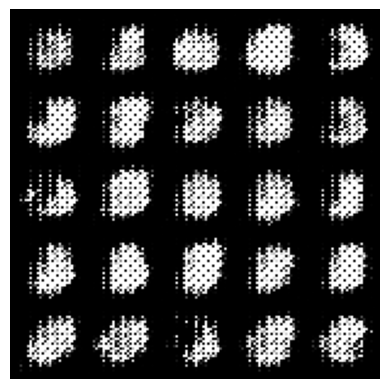

Epoch [4/100], Batch [100/600], D_real: 0.9998, D_fake: 0.0005, Loss_D: 0.0007, Loss_G: 8.7044
Epoch [4/100], Batch [200/600], D_real: 0.9999, D_fake: 0.0001, Loss_D: 0.0003, Loss_G: 9.6946
Epoch [4/100], Batch [300/600], D_real: 0.9999, D_fake: 0.0001, Loss_D: 0.0002, Loss_G: 9.8007
Epoch [4/100], Batch [400/600], D_real: 0.9931, D_fake: 0.0168, Loss_D: 0.0243, Loss_G: 6.1229
Epoch [4/100], Batch [500/600], D_real: 0.9882, D_fake: 0.0024, Loss_D: 0.0146, Loss_G: 6.6848
Epoch [4/100], Batch [600/600], D_real: 0.8997, D_fake: 0.0002, Loss_D: 0.1311, Loss_G: 6.5809


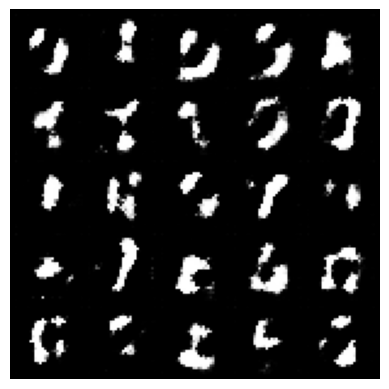

Epoch [5/100], Batch [100/600], D_real: 0.9994, D_fake: 0.0648, Loss_D: 0.0726, Loss_G: 5.7014
Epoch [5/100], Batch [200/600], D_real: 0.9813, D_fake: 0.0057, Loss_D: 0.0250, Loss_G: 6.2672
Epoch [5/100], Batch [300/600], D_real: 0.9909, D_fake: 0.0370, Loss_D: 0.0493, Loss_G: 3.8620
Epoch [5/100], Batch [400/600], D_real: 0.9291, D_fake: 0.0321, Loss_D: 0.1112, Loss_G: 5.0108
Epoch [5/100], Batch [500/600], D_real: 0.8862, D_fake: 0.1130, Loss_D: 0.2632, Loss_G: 4.9389
Epoch [5/100], Batch [600/600], D_real: 0.8988, D_fake: 0.0846, Loss_D: 0.2306, Loss_G: 3.6134


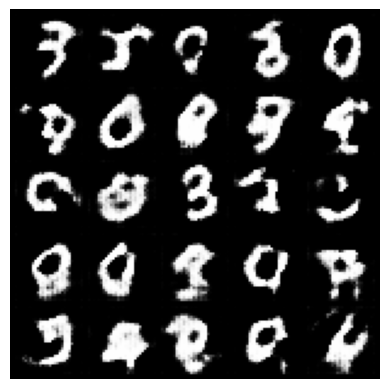

Epoch [6/100], Batch [100/600], D_real: 0.8435, D_fake: 0.1171, Loss_D: 0.3495, Loss_G: 2.9551
Epoch [6/100], Batch [200/600], D_real: 0.9526, D_fake: 0.1246, Loss_D: 0.2029, Loss_G: 3.6859
Epoch [6/100], Batch [300/600], D_real: 0.8697, D_fake: 0.1313, Loss_D: 0.3111, Loss_G: 3.1557
Epoch [6/100], Batch [400/600], D_real: 0.7962, D_fake: 0.0545, Loss_D: 0.3456, Loss_G: 4.0627
Epoch [6/100], Batch [500/600], D_real: 0.8973, D_fake: 0.3124, Loss_D: 0.5477, Loss_G: 2.1963
Epoch [6/100], Batch [600/600], D_real: 0.8386, D_fake: 0.3129, Loss_D: 0.6622, Loss_G: 2.7611


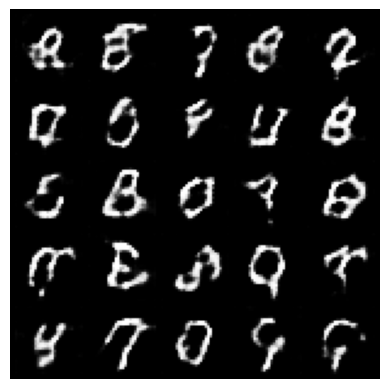

Epoch [7/100], Batch [100/600], D_real: 0.7395, D_fake: 0.0885, Loss_D: 0.4755, Loss_G: 2.6777
Epoch [7/100], Batch [200/600], D_real: 0.9019, D_fake: 0.1636, Loss_D: 0.3223, Loss_G: 2.4820
Epoch [7/100], Batch [300/600], D_real: 0.8945, D_fake: 0.1614, Loss_D: 0.3157, Loss_G: 2.1086
Epoch [7/100], Batch [400/600], D_real: 0.7993, D_fake: 0.1506, Loss_D: 0.4457, Loss_G: 2.3258
Epoch [7/100], Batch [500/600], D_real: 0.7849, D_fake: 0.1640, Loss_D: 0.4755, Loss_G: 2.2941
Epoch [7/100], Batch [600/600], D_real: 0.9091, D_fake: 0.1508, Loss_D: 0.2796, Loss_G: 3.0636


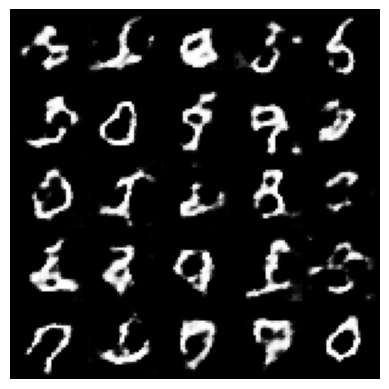

Epoch [8/100], Batch [100/600], D_real: 0.7770, D_fake: 0.0684, Loss_D: 0.3564, Loss_G: 2.6454
Epoch [8/100], Batch [200/600], D_real: 0.8984, D_fake: 0.1340, Loss_D: 0.2704, Loss_G: 2.9423
Epoch [8/100], Batch [300/600], D_real: 0.8101, D_fake: 0.1211, Loss_D: 0.3750, Loss_G: 2.9409
Epoch [8/100], Batch [400/600], D_real: 0.8035, D_fake: 0.1774, Loss_D: 0.4889, Loss_G: 2.6230
Epoch [8/100], Batch [500/600], D_real: 0.8723, D_fake: 0.0885, Loss_D: 0.2577, Loss_G: 3.0759
Epoch [8/100], Batch [600/600], D_real: 0.8456, D_fake: 0.1861, Loss_D: 0.4202, Loss_G: 2.2729


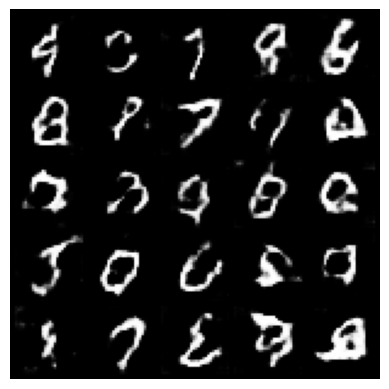

Epoch [9/100], Batch [100/600], D_real: 0.9001, D_fake: 0.1125, Loss_D: 0.2435, Loss_G: 3.5347
Epoch [9/100], Batch [200/600], D_real: 0.8622, D_fake: 0.1321, Loss_D: 0.3119, Loss_G: 2.6398
Epoch [9/100], Batch [300/600], D_real: 0.8708, D_fake: 0.0834, Loss_D: 0.2431, Loss_G: 3.4030
Epoch [9/100], Batch [400/600], D_real: 0.8874, D_fake: 0.0915, Loss_D: 0.2353, Loss_G: 2.3663
Epoch [9/100], Batch [500/600], D_real: 0.9252, D_fake: 0.0798, Loss_D: 0.1774, Loss_G: 3.3802
Epoch [9/100], Batch [600/600], D_real: 0.9355, D_fake: 0.1323, Loss_D: 0.2373, Loss_G: 2.9547


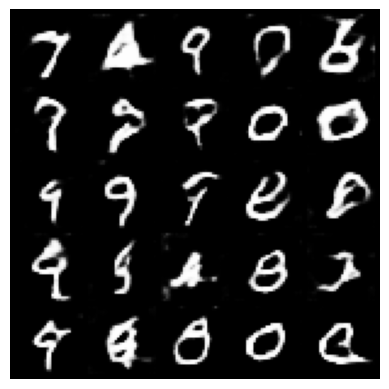

Epoch [10/100], Batch [100/600], D_real: 0.9593, D_fake: 0.1080, Loss_D: 0.1709, Loss_G: 3.8042
Epoch [10/100], Batch [200/600], D_real: 0.8872, D_fake: 0.0644, Loss_D: 0.2111, Loss_G: 3.4804
Epoch [10/100], Batch [300/600], D_real: 0.8530, D_fake: 0.0525, Loss_D: 0.2437, Loss_G: 4.2679
Epoch [10/100], Batch [400/600], D_real: 0.9496, D_fake: 0.1207, Loss_D: 0.1988, Loss_G: 3.1826
Epoch [10/100], Batch [500/600], D_real: 0.9550, D_fake: 0.2433, Loss_D: 0.3862, Loss_G: 2.3594
Epoch [10/100], Batch [600/600], D_real: 0.8812, D_fake: 0.0785, Loss_D: 0.2403, Loss_G: 3.0317


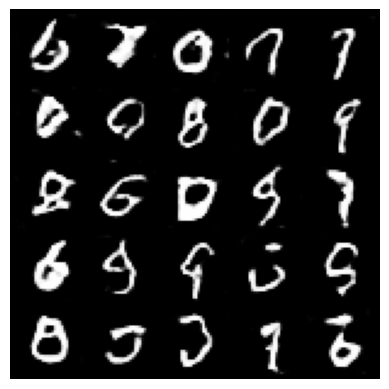

Epoch [11/100], Batch [100/600], D_real: 0.8734, D_fake: 0.0202, Loss_D: 0.1790, Loss_G: 4.3378
Epoch [11/100], Batch [200/600], D_real: 0.9717, D_fake: 0.2613, Loss_D: 0.3935, Loss_G: 2.7721
Epoch [11/100], Batch [300/600], D_real: 0.9635, D_fake: 0.2751, Loss_D: 0.4280, Loss_G: 2.7097
Epoch [11/100], Batch [400/600], D_real: 0.7822, D_fake: 0.0168, Loss_D: 0.3256, Loss_G: 4.6629
Epoch [11/100], Batch [500/600], D_real: 0.9032, D_fake: 0.1661, Loss_D: 0.3249, Loss_G: 2.5449
Epoch [11/100], Batch [600/600], D_real: 0.9432, D_fake: 0.1275, Loss_D: 0.2189, Loss_G: 2.0108


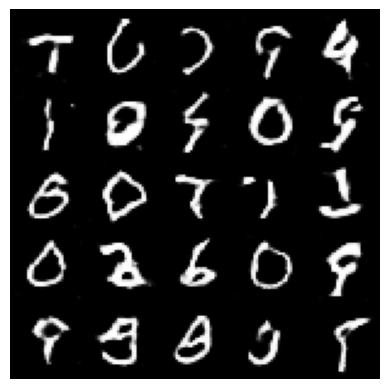

Epoch [12/100], Batch [100/600], D_real: 0.7524, D_fake: 0.0515, Loss_D: 0.4051, Loss_G: 2.1504
Epoch [12/100], Batch [200/600], D_real: 0.9457, D_fake: 0.2088, Loss_D: 0.3247, Loss_G: 2.8715
Epoch [12/100], Batch [300/600], D_real: 0.9342, D_fake: 0.1423, Loss_D: 0.2446, Loss_G: 2.5942
Epoch [12/100], Batch [400/600], D_real: 0.8777, D_fake: 0.1629, Loss_D: 0.3436, Loss_G: 1.8828
Epoch [12/100], Batch [500/600], D_real: 0.8566, D_fake: 0.0740, Loss_D: 0.2770, Loss_G: 3.2293
Epoch [12/100], Batch [600/600], D_real: 0.9114, D_fake: 0.1057, Loss_D: 0.2225, Loss_G: 3.3836


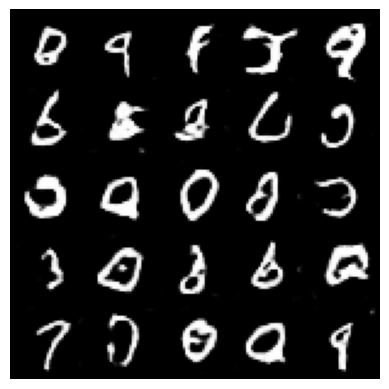

Epoch [13/100], Batch [100/600], D_real: 0.8869, D_fake: 0.0662, Loss_D: 0.2093, Loss_G: 2.7407
Epoch [13/100], Batch [200/600], D_real: 0.9335, D_fake: 0.0854, Loss_D: 0.1819, Loss_G: 2.7628
Epoch [13/100], Batch [300/600], D_real: 0.7189, D_fake: 0.0749, Loss_D: 0.5133, Loss_G: 2.3037
Epoch [13/100], Batch [400/600], D_real: 0.9748, D_fake: 0.3628, Loss_D: 0.6089, Loss_G: 1.7566
Epoch [13/100], Batch [500/600], D_real: 0.9382, D_fake: 0.3850, Loss_D: 0.6910, Loss_G: 1.4600
Epoch [13/100], Batch [600/600], D_real: 0.8217, D_fake: 0.0697, Loss_D: 0.3348, Loss_G: 3.3157


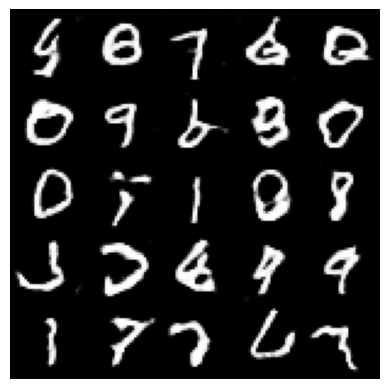

Epoch [14/100], Batch [100/600], D_real: 0.9253, D_fake: 0.2204, Loss_D: 0.3726, Loss_G: 2.1016
Epoch [14/100], Batch [200/600], D_real: 0.8935, D_fake: 0.1470, Loss_D: 0.3130, Loss_G: 2.7081
Epoch [14/100], Batch [300/600], D_real: 0.9067, D_fake: 0.0838, Loss_D: 0.2186, Loss_G: 3.3760
Epoch [14/100], Batch [400/600], D_real: 0.9678, D_fake: 0.1640, Loss_D: 0.2348, Loss_G: 2.2497
Epoch [14/100], Batch [500/600], D_real: 0.9071, D_fake: 0.2825, Loss_D: 0.4877, Loss_G: 2.3742
Epoch [14/100], Batch [600/600], D_real: 0.9176, D_fake: 0.1463, Loss_D: 0.2770, Loss_G: 2.5993


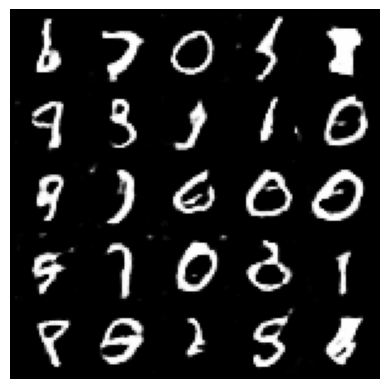

Epoch [15/100], Batch [100/600], D_real: 0.9335, D_fake: 0.1386, Loss_D: 0.2396, Loss_G: 2.5310
Epoch [15/100], Batch [200/600], D_real: 0.9195, D_fake: 0.0933, Loss_D: 0.2161, Loss_G: 4.6017
Epoch [15/100], Batch [300/600], D_real: 0.9496, D_fake: 0.0832, Loss_D: 0.1495, Loss_G: 2.8448
Epoch [15/100], Batch [400/600], D_real: 0.8146, D_fake: 0.1019, Loss_D: 0.3601, Loss_G: 3.1802
Epoch [15/100], Batch [500/600], D_real: 0.9182, D_fake: 0.1544, Loss_D: 0.2882, Loss_G: 3.3514
Epoch [15/100], Batch [600/600], D_real: 0.9015, D_fake: 0.0858, Loss_D: 0.2126, Loss_G: 3.9217


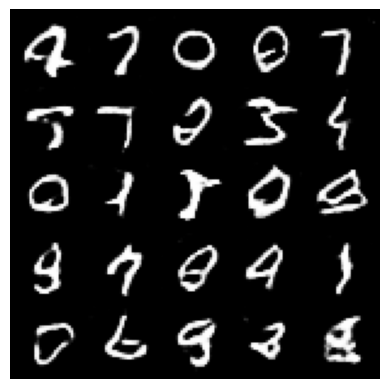

Epoch [16/100], Batch [100/600], D_real: 0.8512, D_fake: 0.0710, Loss_D: 0.2975, Loss_G: 2.8103
Epoch [16/100], Batch [200/600], D_real: 0.8520, D_fake: 0.0763, Loss_D: 0.2805, Loss_G: 2.6168
Epoch [16/100], Batch [300/600], D_real: 0.8355, D_fake: 0.1080, Loss_D: 0.3682, Loss_G: 2.5988
Epoch [16/100], Batch [400/600], D_real: 0.8360, D_fake: 0.0326, Loss_D: 0.2603, Loss_G: 4.0558
Epoch [16/100], Batch [500/600], D_real: 0.9098, D_fake: 0.0680, Loss_D: 0.1838, Loss_G: 4.0353
Epoch [16/100], Batch [600/600], D_real: 0.9180, D_fake: 0.1899, Loss_D: 0.3385, Loss_G: 3.3764


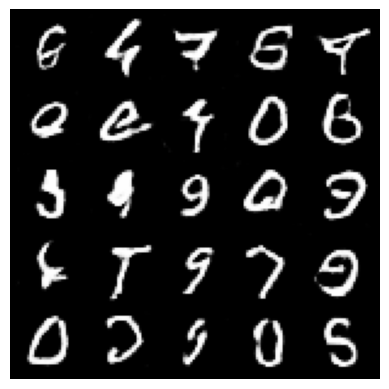

Epoch [17/100], Batch [100/600], D_real: 0.8904, D_fake: 0.1535, Loss_D: 0.3365, Loss_G: 2.9504
Epoch [17/100], Batch [200/600], D_real: 0.8133, D_fake: 0.0230, Loss_D: 0.2678, Loss_G: 4.0030
Epoch [17/100], Batch [300/600], D_real: 0.7746, D_fake: 0.1333, Loss_D: 0.4900, Loss_G: 2.8857
Epoch [17/100], Batch [400/600], D_real: 0.8640, D_fake: 0.0679, Loss_D: 0.2464, Loss_G: 3.9242
Epoch [17/100], Batch [500/600], D_real: 0.8799, D_fake: 0.1892, Loss_D: 0.3952, Loss_G: 2.5339
Epoch [17/100], Batch [600/600], D_real: 0.8117, D_fake: 0.0290, Loss_D: 0.2951, Loss_G: 3.8515


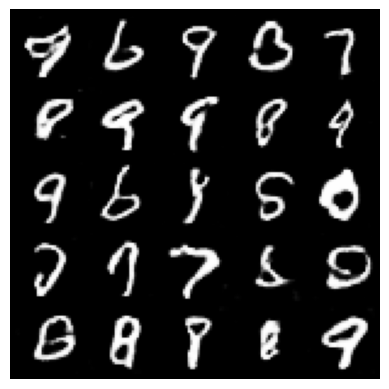

Epoch [18/100], Batch [100/600], D_real: 0.8735, D_fake: 0.1625, Loss_D: 0.3862, Loss_G: 2.8961
Epoch [18/100], Batch [200/600], D_real: 0.8521, D_fake: 0.2373, Loss_D: 0.5044, Loss_G: 2.4567
Epoch [18/100], Batch [300/600], D_real: 0.8237, D_fake: 0.0595, Loss_D: 0.2913, Loss_G: 2.4123
Epoch [18/100], Batch [400/600], D_real: 0.8060, D_fake: 0.2081, Loss_D: 0.5297, Loss_G: 2.6328
Epoch [18/100], Batch [500/600], D_real: 0.9631, D_fake: 0.2260, Loss_D: 0.3500, Loss_G: 1.7578
Epoch [18/100], Batch [600/600], D_real: 0.9417, D_fake: 0.1956, Loss_D: 0.3255, Loss_G: 2.5516


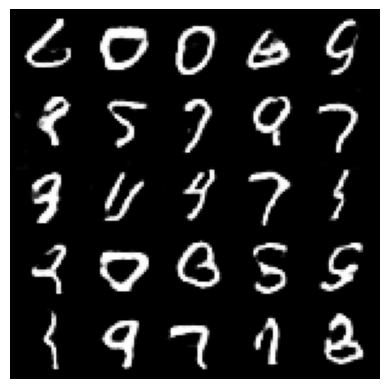

Epoch [19/100], Batch [100/600], D_real: 0.9162, D_fake: 0.0640, Loss_D: 0.1758, Loss_G: 3.0180
Epoch [19/100], Batch [200/600], D_real: 0.8835, D_fake: 0.3242, Loss_D: 0.6132, Loss_G: 2.2512
Epoch [19/100], Batch [300/600], D_real: 0.8864, D_fake: 0.0340, Loss_D: 0.1669, Loss_G: 4.3173
Epoch [19/100], Batch [400/600], D_real: 0.9399, D_fake: 0.1673, Loss_D: 0.2724, Loss_G: 1.5470
Epoch [19/100], Batch [500/600], D_real: 0.8647, D_fake: 0.0704, Loss_D: 0.2552, Loss_G: 4.2239
Epoch [19/100], Batch [600/600], D_real: 0.9023, D_fake: 0.1020, Loss_D: 0.2446, Loss_G: 2.5080


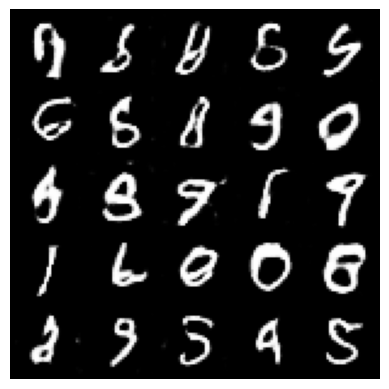

Epoch [20/100], Batch [100/600], D_real: 0.9396, D_fake: 0.3126, Loss_D: 0.5469, Loss_G: 2.2605
Epoch [20/100], Batch [200/600], D_real: 0.8797, D_fake: 0.1009, Loss_D: 0.2625, Loss_G: 3.5236
Epoch [20/100], Batch [300/600], D_real: 0.8993, D_fake: 0.0566, Loss_D: 0.1855, Loss_G: 4.9916
Epoch [20/100], Batch [400/600], D_real: 0.9634, D_fake: 0.0718, Loss_D: 0.1240, Loss_G: 4.2874
Epoch [20/100], Batch [500/600], D_real: 0.8830, D_fake: 0.1400, Loss_D: 0.3221, Loss_G: 3.8115
Epoch [20/100], Batch [600/600], D_real: 0.9383, D_fake: 0.0860, Loss_D: 0.1678, Loss_G: 3.0137


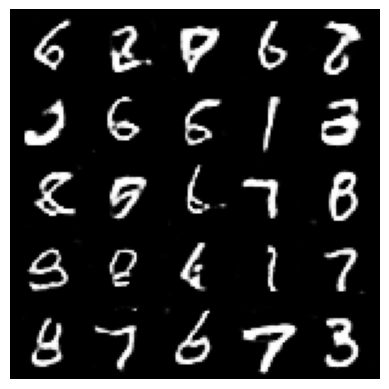

Epoch [21/100], Batch [100/600], D_real: 0.9459, D_fake: 0.1674, Loss_D: 0.2692, Loss_G: 3.2713
Epoch [21/100], Batch [200/600], D_real: 0.7855, D_fake: 0.1915, Loss_D: 0.5518, Loss_G: 2.3909
Epoch [21/100], Batch [300/600], D_real: 0.8915, D_fake: 0.0286, Loss_D: 0.1602, Loss_G: 3.8471
Epoch [21/100], Batch [400/600], D_real: 0.9417, D_fake: 0.2611, Loss_D: 0.4153, Loss_G: 2.6839
Epoch [21/100], Batch [500/600], D_real: 0.7572, D_fake: 0.0424, Loss_D: 0.4009, Loss_G: 3.4054
Epoch [21/100], Batch [600/600], D_real: 0.7967, D_fake: 0.0443, Loss_D: 0.3238, Loss_G: 3.7307


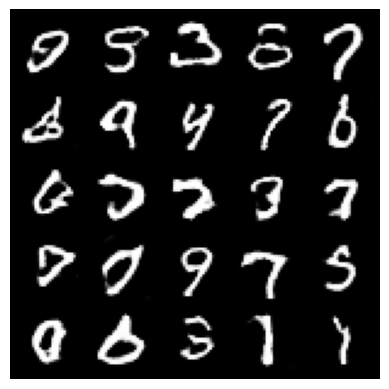

Epoch [22/100], Batch [100/600], D_real: 0.8328, D_fake: 0.0562, Loss_D: 0.2860, Loss_G: 2.8964
Epoch [22/100], Batch [200/600], D_real: 0.7938, D_fake: 0.2346, Loss_D: 0.5794, Loss_G: 2.7094
Epoch [22/100], Batch [300/600], D_real: 0.9337, D_fake: 0.1247, Loss_D: 0.2424, Loss_G: 3.3209
Epoch [22/100], Batch [400/600], D_real: 0.8312, D_fake: 0.0742, Loss_D: 0.3159, Loss_G: 5.2237
Epoch [22/100], Batch [500/600], D_real: 0.9880, D_fake: 0.2470, Loss_D: 0.3471, Loss_G: 3.7474
Epoch [22/100], Batch [600/600], D_real: 0.9086, D_fake: 0.0793, Loss_D: 0.2108, Loss_G: 2.7371


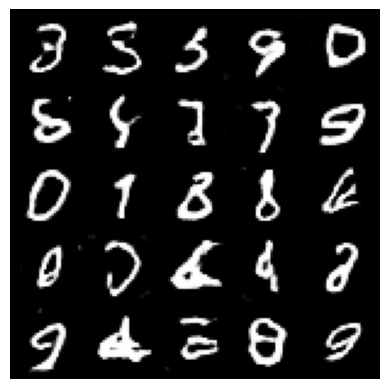

Epoch [23/100], Batch [100/600], D_real: 0.8520, D_fake: 0.0978, Loss_D: 0.3129, Loss_G: 2.7623
Epoch [23/100], Batch [200/600], D_real: 0.9332, D_fake: 0.1745, Loss_D: 0.3320, Loss_G: 2.4189
Epoch [23/100], Batch [300/600], D_real: 0.8847, D_fake: 0.1002, Loss_D: 0.2684, Loss_G: 2.6420
Epoch [23/100], Batch [400/600], D_real: 0.9264, D_fake: 0.1759, Loss_D: 0.3004, Loss_G: 2.1640
Epoch [23/100], Batch [500/600], D_real: 0.9687, D_fake: 0.1644, Loss_D: 0.2722, Loss_G: 3.1220
Epoch [23/100], Batch [600/600], D_real: 0.9700, D_fake: 0.1884, Loss_D: 0.2894, Loss_G: 2.9673


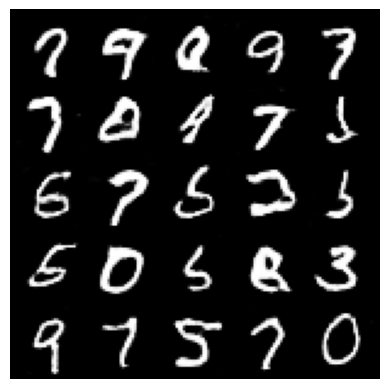

Epoch [24/100], Batch [100/600], D_real: 0.9093, D_fake: 0.2515, Loss_D: 0.4511, Loss_G: 2.6740
Epoch [24/100], Batch [200/600], D_real: 0.8778, D_fake: 0.2139, Loss_D: 0.4612, Loss_G: 2.2405
Epoch [24/100], Batch [300/600], D_real: 0.9072, D_fake: 0.0488, Loss_D: 0.1652, Loss_G: 4.1932
Epoch [24/100], Batch [400/600], D_real: 0.8202, D_fake: 0.0783, Loss_D: 0.3376, Loss_G: 3.2735
Epoch [24/100], Batch [500/600], D_real: 0.9015, D_fake: 0.2877, Loss_D: 0.5642, Loss_G: 2.6146
Epoch [24/100], Batch [600/600], D_real: 0.9319, D_fake: 0.3053, Loss_D: 0.5365, Loss_G: 2.1950


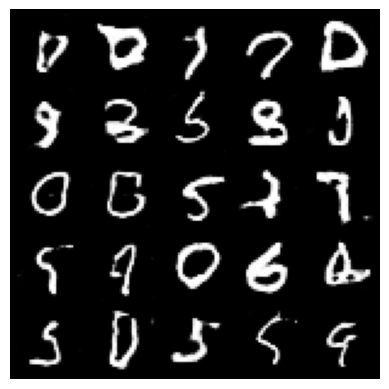

Epoch [25/100], Batch [100/600], D_real: 0.8373, D_fake: 0.0679, Loss_D: 0.2989, Loss_G: 3.4076
Epoch [25/100], Batch [200/600], D_real: 0.9350, D_fake: 0.2937, Loss_D: 0.5006, Loss_G: 2.0862
Epoch [25/100], Batch [300/600], D_real: 0.8350, D_fake: 0.0917, Loss_D: 0.3239, Loss_G: 2.9901
Epoch [25/100], Batch [400/600], D_real: 0.7406, D_fake: 0.2129, Loss_D: 0.6981, Loss_G: 1.8829
Epoch [25/100], Batch [500/600], D_real: 0.9059, D_fake: 0.1621, Loss_D: 0.3072, Loss_G: 1.6675
Epoch [25/100], Batch [600/600], D_real: 0.7823, D_fake: 0.0318, Loss_D: 0.3234, Loss_G: 4.9543


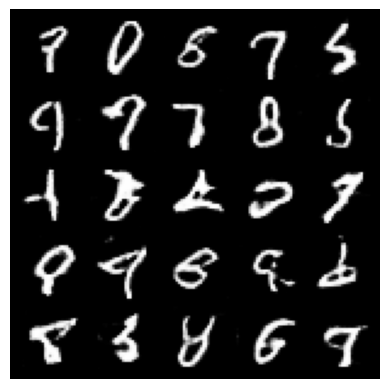

Epoch [26/100], Batch [100/600], D_real: 0.8590, D_fake: 0.1454, Loss_D: 0.3720, Loss_G: 2.5047
Epoch [26/100], Batch [200/600], D_real: 0.9575, D_fake: 0.1541, Loss_D: 0.2401, Loss_G: 2.7108
Epoch [26/100], Batch [300/600], D_real: 0.9737, D_fake: 0.4437, Loss_D: 0.7618, Loss_G: 2.2816
Epoch [26/100], Batch [400/600], D_real: 0.8291, D_fake: 0.0515, Loss_D: 0.2769, Loss_G: 3.9268
Epoch [26/100], Batch [500/600], D_real: 0.8921, D_fake: 0.2276, Loss_D: 0.4470, Loss_G: 3.1776
Epoch [26/100], Batch [600/600], D_real: 0.8913, D_fake: 0.0730, Loss_D: 0.2160, Loss_G: 3.6494


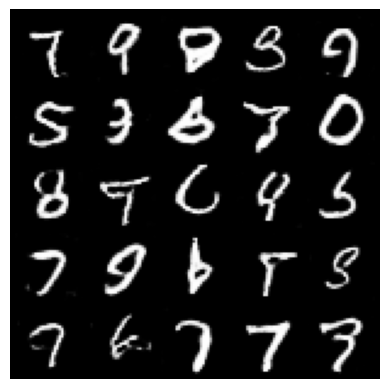

Epoch [27/100], Batch [100/600], D_real: 0.9582, D_fake: 0.0929, Loss_D: 0.1511, Loss_G: 3.0382
Epoch [27/100], Batch [200/600], D_real: 0.7997, D_fake: 0.0439, Loss_D: 0.3155, Loss_G: 3.3183
Epoch [27/100], Batch [300/600], D_real: 0.8869, D_fake: 0.2049, Loss_D: 0.4453, Loss_G: 3.9291
Epoch [27/100], Batch [400/600], D_real: 0.7837, D_fake: 0.0476, Loss_D: 0.3728, Loss_G: 4.2181
Epoch [27/100], Batch [500/600], D_real: 0.8210, D_fake: 0.0740, Loss_D: 0.3327, Loss_G: 3.2533
Epoch [27/100], Batch [600/600], D_real: 0.8791, D_fake: 0.0979, Loss_D: 0.2607, Loss_G: 2.7810


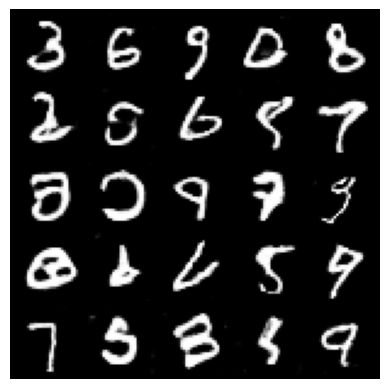

Epoch [28/100], Batch [100/600], D_real: 0.8932, D_fake: 0.1696, Loss_D: 0.3516, Loss_G: 2.2066
Epoch [28/100], Batch [200/600], D_real: 0.7676, D_fake: 0.0553, Loss_D: 0.3858, Loss_G: 2.8796
Epoch [28/100], Batch [300/600], D_real: 0.7920, D_fake: 0.2894, Loss_D: 0.7302, Loss_G: 1.6365
Epoch [28/100], Batch [400/600], D_real: 0.9202, D_fake: 0.1255, Loss_D: 0.2517, Loss_G: 4.1811
Epoch [28/100], Batch [500/600], D_real: 0.9038, D_fake: 0.0472, Loss_D: 0.1774, Loss_G: 3.9279
Epoch [28/100], Batch [600/600], D_real: 0.9291, D_fake: 0.1459, Loss_D: 0.2623, Loss_G: 2.9623


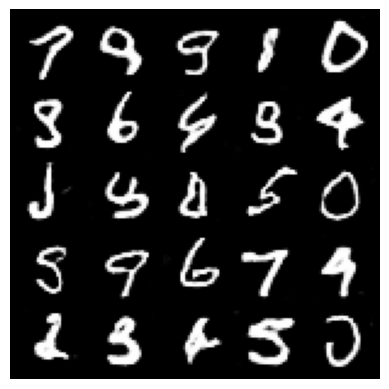

Epoch [29/100], Batch [100/600], D_real: 0.7582, D_fake: 0.1069, Loss_D: 0.4964, Loss_G: 2.1360
Epoch [29/100], Batch [200/600], D_real: 0.9500, D_fake: 0.1446, Loss_D: 0.2448, Loss_G: 2.7493
Epoch [29/100], Batch [300/600], D_real: 0.7298, D_fake: 0.0304, Loss_D: 0.4556, Loss_G: 4.0799
Epoch [29/100], Batch [400/600], D_real: 0.7080, D_fake: 0.0769, Loss_D: 0.5571, Loss_G: 2.7892
Epoch [29/100], Batch [500/600], D_real: 0.7930, D_fake: 0.0970, Loss_D: 0.4041, Loss_G: 3.2481
Epoch [29/100], Batch [600/600], D_real: 0.9381, D_fake: 0.1713, Loss_D: 0.2940, Loss_G: 2.0580


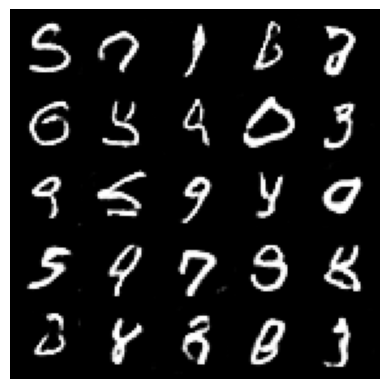

Epoch [30/100], Batch [100/600], D_real: 0.5869, D_fake: 0.0742, Loss_D: 0.7664, Loss_G: 2.4027
Epoch [30/100], Batch [200/600], D_real: 0.7916, D_fake: 0.0875, Loss_D: 0.3890, Loss_G: 2.6168
Epoch [30/100], Batch [300/600], D_real: 0.9605, D_fake: 0.1974, Loss_D: 0.3006, Loss_G: 2.1354
Epoch [30/100], Batch [400/600], D_real: 0.9080, D_fake: 0.1240, Loss_D: 0.2747, Loss_G: 2.3491
Epoch [30/100], Batch [500/600], D_real: 0.8799, D_fake: 0.1241, Loss_D: 0.2935, Loss_G: 3.8724
Epoch [30/100], Batch [600/600], D_real: 0.8594, D_fake: 0.0574, Loss_D: 0.2655, Loss_G: 3.2814


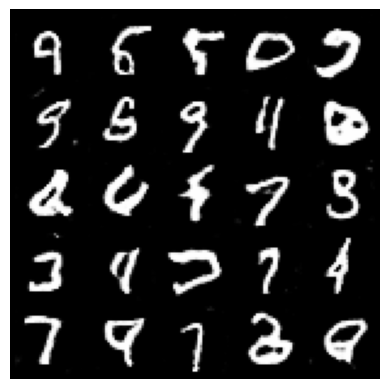

Epoch [31/100], Batch [100/600], D_real: 0.8508, D_fake: 0.1327, Loss_D: 0.3544, Loss_G: 2.4673
Epoch [31/100], Batch [200/600], D_real: 0.9303, D_fake: 0.1043, Loss_D: 0.2046, Loss_G: 2.8487
Epoch [31/100], Batch [300/600], D_real: 0.8934, D_fake: 0.2566, Loss_D: 0.4589, Loss_G: 1.7442
Epoch [31/100], Batch [400/600], D_real: 0.9625, D_fake: 0.1914, Loss_D: 0.3431, Loss_G: 2.0518
Epoch [31/100], Batch [500/600], D_real: 0.9316, D_fake: 0.1800, Loss_D: 0.3228, Loss_G: 2.9517
Epoch [31/100], Batch [600/600], D_real: 0.8774, D_fake: 0.0946, Loss_D: 0.2587, Loss_G: 3.4378


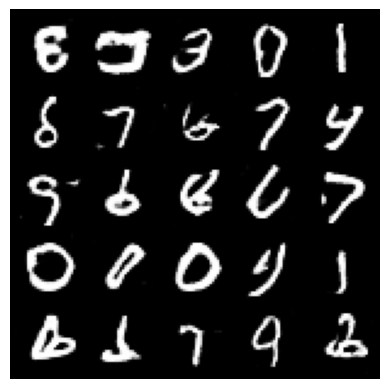

Epoch [32/100], Batch [100/600], D_real: 0.9157, D_fake: 0.0614, Loss_D: 0.1618, Loss_G: 3.5252
Epoch [32/100], Batch [200/600], D_real: 0.8553, D_fake: 0.0583, Loss_D: 0.2501, Loss_G: 3.2582
Epoch [32/100], Batch [300/600], D_real: 0.7826, D_fake: 0.0732, Loss_D: 0.3920, Loss_G: 1.9057
Epoch [32/100], Batch [400/600], D_real: 0.8963, D_fake: 0.1626, Loss_D: 0.3622, Loss_G: 3.5089
Epoch [32/100], Batch [500/600], D_real: 0.9513, D_fake: 0.1546, Loss_D: 0.2537, Loss_G: 2.7082
Epoch [32/100], Batch [600/600], D_real: 0.9267, D_fake: 0.2843, Loss_D: 0.5149, Loss_G: 2.2972


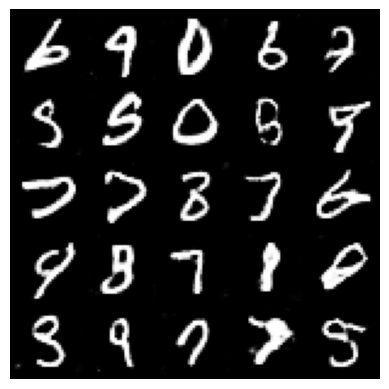

Epoch [33/100], Batch [100/600], D_real: 0.9048, D_fake: 0.0527, Loss_D: 0.1685, Loss_G: 3.5817
Epoch [33/100], Batch [200/600], D_real: 0.8588, D_fake: 0.1027, Loss_D: 0.3084, Loss_G: 3.4592
Epoch [33/100], Batch [300/600], D_real: 0.7970, D_fake: 0.0364, Loss_D: 0.3206, Loss_G: 4.1372
Epoch [33/100], Batch [400/600], D_real: 0.9001, D_fake: 0.1519, Loss_D: 0.3056, Loss_G: 2.6609
Epoch [33/100], Batch [500/600], D_real: 0.8964, D_fake: 0.1299, Loss_D: 0.2777, Loss_G: 3.2348
Epoch [33/100], Batch [600/600], D_real: 0.9100, D_fake: 0.2490, Loss_D: 0.4688, Loss_G: 2.9248


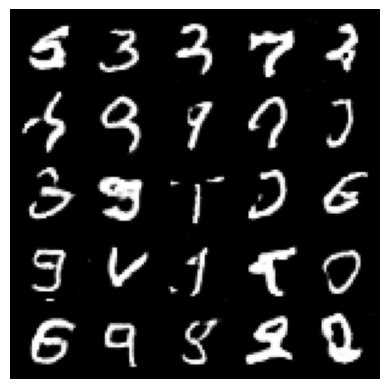

Epoch [34/100], Batch [100/600], D_real: 0.8684, D_fake: 0.0509, Loss_D: 0.2253, Loss_G: 3.7035
Epoch [34/100], Batch [200/600], D_real: 0.8028, D_fake: 0.1490, Loss_D: 0.4565, Loss_G: 2.3628
Epoch [34/100], Batch [300/600], D_real: 0.8238, D_fake: 0.0954, Loss_D: 0.3474, Loss_G: 2.8537
Epoch [34/100], Batch [400/600], D_real: 0.9413, D_fake: 0.1069, Loss_D: 0.1914, Loss_G: 3.2841
Epoch [34/100], Batch [500/600], D_real: 0.5704, D_fake: 0.0610, Loss_D: 0.8126, Loss_G: 2.8183
Epoch [34/100], Batch [600/600], D_real: 0.8844, D_fake: 0.2164, Loss_D: 0.4507, Loss_G: 1.9343


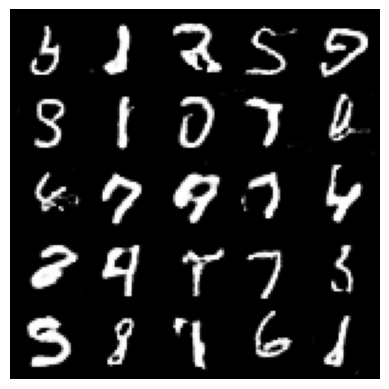

Epoch [35/100], Batch [100/600], D_real: 0.9719, D_fake: 0.4416, Loss_D: 0.8033, Loss_G: 1.9300
Epoch [35/100], Batch [200/600], D_real: 0.9243, D_fake: 0.1280, Loss_D: 0.2383, Loss_G: 2.6542
Epoch [35/100], Batch [300/600], D_real: 0.9265, D_fake: 0.2341, Loss_D: 0.4173, Loss_G: 2.7903
Epoch [35/100], Batch [400/600], D_real: 0.9073, D_fake: 0.1158, Loss_D: 0.2580, Loss_G: 3.8710
Epoch [35/100], Batch [500/600], D_real: 0.8736, D_fake: 0.0902, Loss_D: 0.2586, Loss_G: 3.4179
Epoch [35/100], Batch [600/600], D_real: 0.9011, D_fake: 0.1451, Loss_D: 0.3203, Loss_G: 2.6445


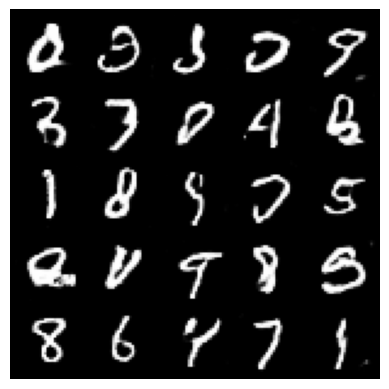

Epoch [36/100], Batch [100/600], D_real: 0.8803, D_fake: 0.1661, Loss_D: 0.3733, Loss_G: 2.6242
Epoch [36/100], Batch [200/600], D_real: 0.8786, D_fake: 0.1998, Loss_D: 0.4118, Loss_G: 1.7654
Epoch [36/100], Batch [300/600], D_real: 0.6556, D_fake: 0.0366, Loss_D: 0.5807, Loss_G: 4.3823
Epoch [36/100], Batch [400/600], D_real: 0.9265, D_fake: 0.2094, Loss_D: 0.3799, Loss_G: 3.6235
Epoch [36/100], Batch [500/600], D_real: 0.9649, D_fake: 0.3082, Loss_D: 0.5036, Loss_G: 2.2468
Epoch [36/100], Batch [600/600], D_real: 0.7653, D_fake: 0.0147, Loss_D: 0.3390, Loss_G: 5.6099


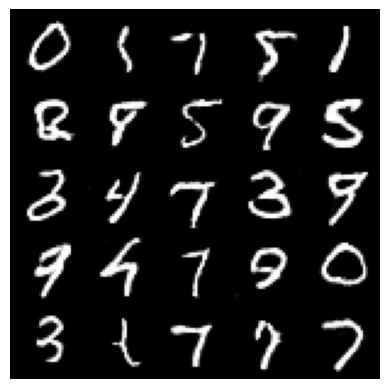

Epoch [37/100], Batch [100/600], D_real: 0.9419, D_fake: 0.2453, Loss_D: 0.4122, Loss_G: 3.3636
Epoch [37/100], Batch [200/600], D_real: 0.8286, D_fake: 0.1244, Loss_D: 0.4060, Loss_G: 2.3994
Epoch [37/100], Batch [300/600], D_real: 0.9371, D_fake: 0.1086, Loss_D: 0.2091, Loss_G: 3.4419
Epoch [37/100], Batch [400/600], D_real: 0.9235, D_fake: 0.2269, Loss_D: 0.4115, Loss_G: 1.6551
Epoch [37/100], Batch [500/600], D_real: 0.9435, D_fake: 0.1897, Loss_D: 0.3124, Loss_G: 2.8754
Epoch [37/100], Batch [600/600], D_real: 0.7641, D_fake: 0.2428, Loss_D: 0.6806, Loss_G: 1.2476


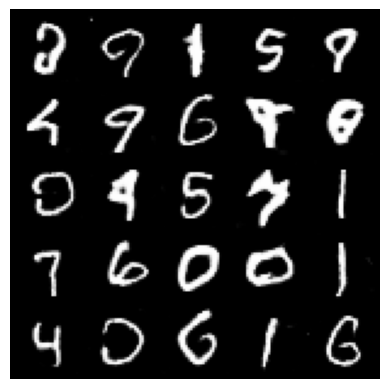

Epoch [38/100], Batch [100/600], D_real: 0.8980, D_fake: 0.0781, Loss_D: 0.2337, Loss_G: 3.9087
Epoch [38/100], Batch [200/600], D_real: 0.9773, D_fake: 0.2361, Loss_D: 0.3724, Loss_G: 3.6985
Epoch [38/100], Batch [300/600], D_real: 0.7197, D_fake: 0.0502, Loss_D: 0.4780, Loss_G: 3.7486
Epoch [38/100], Batch [400/600], D_real: 0.9489, D_fake: 0.1681, Loss_D: 0.2906, Loss_G: 2.2130
Epoch [38/100], Batch [500/600], D_real: 0.7878, D_fake: 0.1489, Loss_D: 0.4662, Loss_G: 3.3704
Epoch [38/100], Batch [600/600], D_real: 0.8997, D_fake: 0.1955, Loss_D: 0.4269, Loss_G: 2.2553


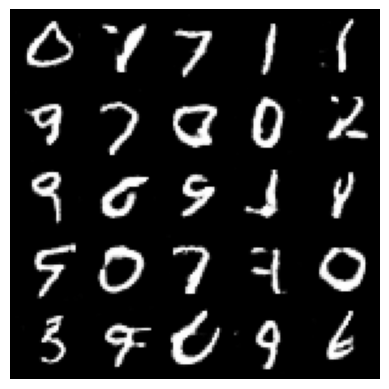

Epoch [39/100], Batch [100/600], D_real: 0.7904, D_fake: 0.1118, Loss_D: 0.4426, Loss_G: 3.3407
Epoch [39/100], Batch [200/600], D_real: 0.8939, D_fake: 0.1094, Loss_D: 0.2767, Loss_G: 3.7141
Epoch [39/100], Batch [300/600], D_real: 0.8640, D_fake: 0.1497, Loss_D: 0.3676, Loss_G: 3.3633
Epoch [39/100], Batch [400/600], D_real: 0.5429, D_fake: 0.0110, Loss_D: 0.8291, Loss_G: 5.0584
Epoch [39/100], Batch [500/600], D_real: 0.8553, D_fake: 0.0644, Loss_D: 0.2755, Loss_G: 2.8645
Epoch [39/100], Batch [600/600], D_real: 0.9571, D_fake: 0.1896, Loss_D: 0.3066, Loss_G: 2.9912


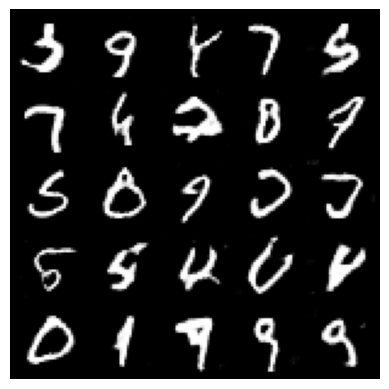

Epoch [40/100], Batch [100/600], D_real: 0.9638, D_fake: 0.3040, Loss_D: 0.5082, Loss_G: 2.1717
Epoch [40/100], Batch [200/600], D_real: 0.9125, D_fake: 0.2087, Loss_D: 0.3709, Loss_G: 2.7562
Epoch [40/100], Batch [300/600], D_real: 0.8990, D_fake: 0.2969, Loss_D: 0.5782, Loss_G: 2.2009
Epoch [40/100], Batch [400/600], D_real: 0.9163, D_fake: 0.1368, Loss_D: 0.2767, Loss_G: 2.8024
Epoch [40/100], Batch [500/600], D_real: 0.7837, D_fake: 0.1927, Loss_D: 0.5568, Loss_G: 2.2345
Epoch [40/100], Batch [600/600], D_real: 0.9226, D_fake: 0.2842, Loss_D: 0.5026, Loss_G: 2.3944


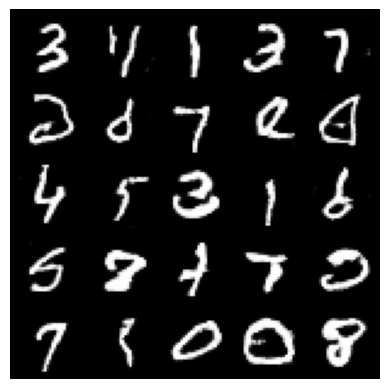

Epoch [41/100], Batch [100/600], D_real: 0.8585, D_fake: 0.0794, Loss_D: 0.2875, Loss_G: 3.5450
Epoch [41/100], Batch [200/600], D_real: 0.9549, D_fake: 0.2630, Loss_D: 0.4340, Loss_G: 3.2493
Epoch [41/100], Batch [300/600], D_real: 0.8179, D_fake: 0.1072, Loss_D: 0.3827, Loss_G: 3.1433
Epoch [41/100], Batch [400/600], D_real: 0.7555, D_fake: 0.2354, Loss_D: 0.6725, Loss_G: 1.1576
Epoch [41/100], Batch [500/600], D_real: 0.7453, D_fake: 0.1096, Loss_D: 0.5333, Loss_G: 3.4262
Epoch [41/100], Batch [600/600], D_real: 0.8613, D_fake: 0.0696, Loss_D: 0.2548, Loss_G: 4.1076


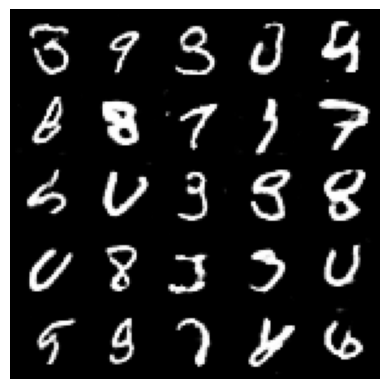

Epoch [42/100], Batch [100/600], D_real: 0.8710, D_fake: 0.1745, Loss_D: 0.3963, Loss_G: 2.1895
Epoch [42/100], Batch [200/600], D_real: 0.8729, D_fake: 0.1037, Loss_D: 0.2934, Loss_G: 3.0090
Epoch [42/100], Batch [300/600], D_real: 0.9284, D_fake: 0.1412, Loss_D: 0.2587, Loss_G: 2.0054
Epoch [42/100], Batch [400/600], D_real: 0.7205, D_fake: 0.0731, Loss_D: 0.5029, Loss_G: 2.6431
Epoch [42/100], Batch [500/600], D_real: 0.9604, D_fake: 0.2172, Loss_D: 0.3517, Loss_G: 2.9730
Epoch [42/100], Batch [600/600], D_real: 0.8972, D_fake: 0.1488, Loss_D: 0.3138, Loss_G: 2.4069


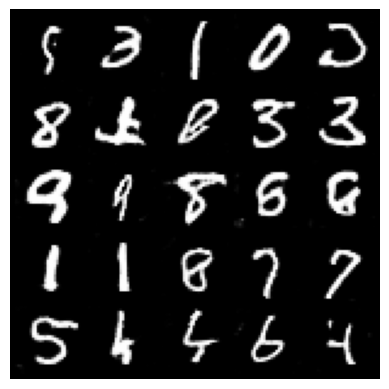

Epoch [43/100], Batch [100/600], D_real: 0.8661, D_fake: 0.1318, Loss_D: 0.3540, Loss_G: 3.6189
Epoch [43/100], Batch [200/600], D_real: 0.9460, D_fake: 0.3389, Loss_D: 0.5574, Loss_G: 1.4630
Epoch [43/100], Batch [300/600], D_real: 0.9204, D_fake: 0.1667, Loss_D: 0.3238, Loss_G: 2.9723
Epoch [43/100], Batch [400/600], D_real: 0.9113, D_fake: 0.1385, Loss_D: 0.2823, Loss_G: 2.6781
Epoch [43/100], Batch [500/600], D_real: 0.9294, D_fake: 0.3082, Loss_D: 0.5372, Loss_G: 2.1866
Epoch [43/100], Batch [600/600], D_real: 0.9637, D_fake: 0.2260, Loss_D: 0.3742, Loss_G: 4.2127


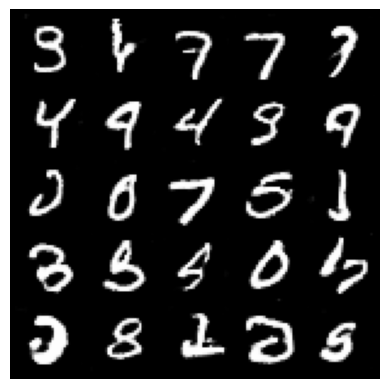

Epoch [44/100], Batch [100/600], D_real: 0.8796, D_fake: 0.1452, Loss_D: 0.3300, Loss_G: 1.9506
Epoch [44/100], Batch [200/600], D_real: 0.7877, D_fake: 0.1590, Loss_D: 0.4893, Loss_G: 2.5063
Epoch [44/100], Batch [300/600], D_real: 0.7638, D_fake: 0.0585, Loss_D: 0.4043, Loss_G: 3.2080
Epoch [44/100], Batch [400/600], D_real: 0.8374, D_fake: 0.1205, Loss_D: 0.3642, Loss_G: 2.8139
Epoch [44/100], Batch [500/600], D_real: 0.8054, D_fake: 0.0642, Loss_D: 0.3472, Loss_G: 4.1768
Epoch [44/100], Batch [600/600], D_real: 0.6035, D_fake: 0.0781, Loss_D: 0.7724, Loss_G: 3.5072


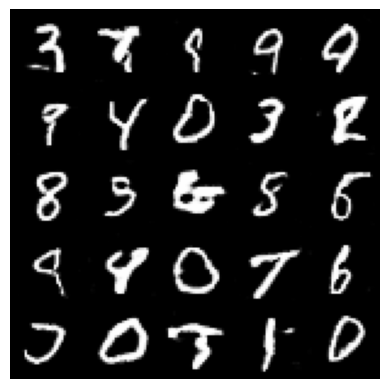

Epoch [45/100], Batch [100/600], D_real: 0.7428, D_fake: 0.0697, Loss_D: 0.4671, Loss_G: 2.6988
Epoch [45/100], Batch [200/600], D_real: 0.8909, D_fake: 0.1588, Loss_D: 0.3473, Loss_G: 2.9639
Epoch [45/100], Batch [300/600], D_real: 0.9156, D_fake: 0.1301, Loss_D: 0.2932, Loss_G: 2.6216
Epoch [45/100], Batch [400/600], D_real: 0.8833, D_fake: 0.1504, Loss_D: 0.3337, Loss_G: 2.8201
Epoch [45/100], Batch [500/600], D_real: 0.7867, D_fake: 0.1540, Loss_D: 0.5027, Loss_G: 3.3499
Epoch [45/100], Batch [600/600], D_real: 0.8537, D_fake: 0.0446, Loss_D: 0.2792, Loss_G: 5.1271


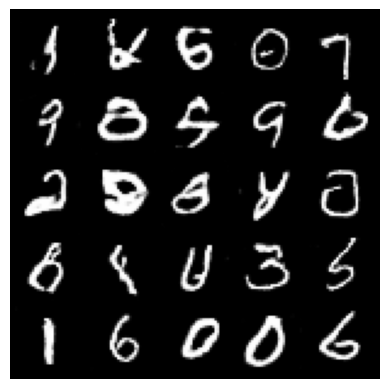

Epoch [46/100], Batch [100/600], D_real: 0.8394, D_fake: 0.0860, Loss_D: 0.3057, Loss_G: 3.2584
Epoch [46/100], Batch [200/600], D_real: 0.8087, D_fake: 0.0836, Loss_D: 0.3690, Loss_G: 2.7191
Epoch [46/100], Batch [300/600], D_real: 0.7581, D_fake: 0.0687, Loss_D: 0.4620, Loss_G: 3.5927
Epoch [46/100], Batch [400/600], D_real: 0.6599, D_fake: 0.0769, Loss_D: 0.6367, Loss_G: 3.4089
Epoch [46/100], Batch [500/600], D_real: 0.8503, D_fake: 0.0757, Loss_D: 0.2697, Loss_G: 3.1347
Epoch [46/100], Batch [600/600], D_real: 0.9693, D_fake: 0.2727, Loss_D: 0.4275, Loss_G: 2.5170


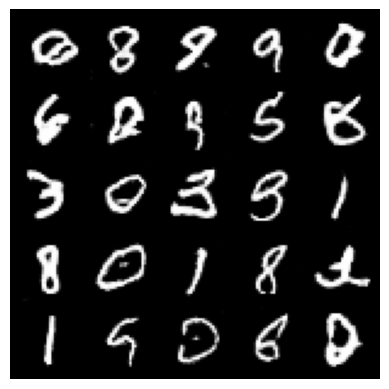

Epoch [47/100], Batch [100/600], D_real: 0.7796, D_fake: 0.0226, Loss_D: 0.3328, Loss_G: 3.4487
Epoch [47/100], Batch [200/600], D_real: 0.8651, D_fake: 0.0549, Loss_D: 0.2264, Loss_G: 4.5390
Epoch [47/100], Batch [300/600], D_real: 0.7235, D_fake: 0.0895, Loss_D: 0.5083, Loss_G: 3.7079
Epoch [47/100], Batch [400/600], D_real: 0.7427, D_fake: 0.0892, Loss_D: 0.4962, Loss_G: 3.0523
Epoch [47/100], Batch [500/600], D_real: 0.8271, D_fake: 0.1212, Loss_D: 0.3827, Loss_G: 1.5424
Epoch [47/100], Batch [600/600], D_real: 0.8294, D_fake: 0.0888, Loss_D: 0.3369, Loss_G: 3.9264


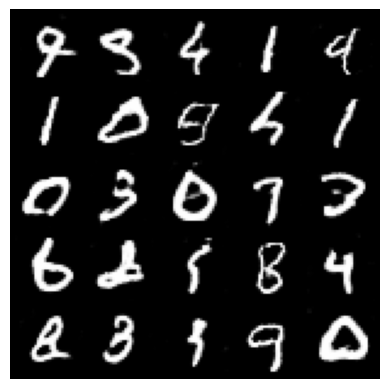

Epoch [48/100], Batch [100/600], D_real: 0.9093, D_fake: 0.3184, Loss_D: 0.5919, Loss_G: 2.8486
Epoch [48/100], Batch [200/600], D_real: 0.9286, D_fake: 0.1818, Loss_D: 0.3243, Loss_G: 2.8016
Epoch [48/100], Batch [300/600], D_real: 0.7890, D_fake: 0.0833, Loss_D: 0.4042, Loss_G: 2.9223
Epoch [48/100], Batch [400/600], D_real: 0.9284, D_fake: 0.0758, Loss_D: 0.1672, Loss_G: 3.9624
Epoch [48/100], Batch [500/600], D_real: 0.9068, D_fake: 0.3534, Loss_D: 0.6822, Loss_G: 1.1758
Epoch [48/100], Batch [600/600], D_real: 0.9362, D_fake: 0.1758, Loss_D: 0.3113, Loss_G: 3.4806


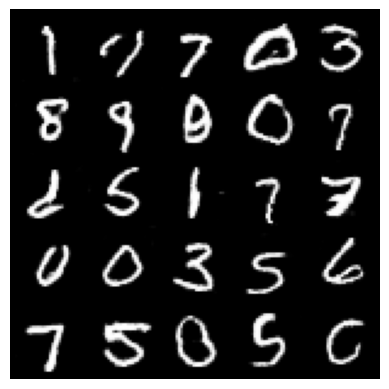

Epoch [49/100], Batch [100/600], D_real: 0.8681, D_fake: 0.1179, Loss_D: 0.3109, Loss_G: 2.3756
Epoch [49/100], Batch [200/600], D_real: 0.8136, D_fake: 0.1388, Loss_D: 0.4122, Loss_G: 2.1361
Epoch [49/100], Batch [300/600], D_real: 0.9327, D_fake: 0.1689, Loss_D: 0.2942, Loss_G: 2.9511
Epoch [49/100], Batch [400/600], D_real: 0.8647, D_fake: 0.0657, Loss_D: 0.2483, Loss_G: 4.1660
Epoch [49/100], Batch [500/600], D_real: 0.8483, D_fake: 0.1805, Loss_D: 0.4382, Loss_G: 2.9080
Epoch [49/100], Batch [600/600], D_real: 0.9279, D_fake: 0.0556, Loss_D: 0.1494, Loss_G: 5.0329


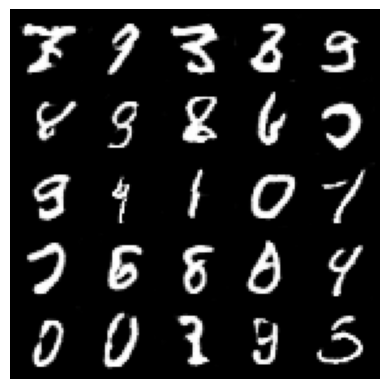

Epoch [50/100], Batch [100/600], D_real: 0.7500, D_fake: 0.1059, Loss_D: 0.5102, Loss_G: 3.4662
Epoch [50/100], Batch [200/600], D_real: 0.7684, D_fake: 0.1418, Loss_D: 0.5034, Loss_G: 3.2911
Epoch [50/100], Batch [300/600], D_real: 0.9712, D_fake: 0.1581, Loss_D: 0.2315, Loss_G: 2.5762
Epoch [50/100], Batch [400/600], D_real: 0.7448, D_fake: 0.1080, Loss_D: 0.5068, Loss_G: 2.6246
Epoch [50/100], Batch [500/600], D_real: 0.9341, D_fake: 0.1882, Loss_D: 0.3326, Loss_G: 2.6086
Epoch [50/100], Batch [600/600], D_real: 0.8463, D_fake: 0.1441, Loss_D: 0.4034, Loss_G: 3.4451


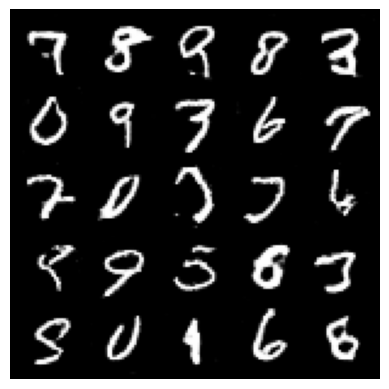

Epoch [51/100], Batch [100/600], D_real: 0.8436, D_fake: 0.0872, Loss_D: 0.2982, Loss_G: 2.0635
Epoch [51/100], Batch [200/600], D_real: 0.8853, D_fake: 0.1776, Loss_D: 0.3895, Loss_G: 2.4416
Epoch [51/100], Batch [300/600], D_real: 0.9047, D_fake: 0.1654, Loss_D: 0.3324, Loss_G: 2.9402
Epoch [51/100], Batch [400/600], D_real: 0.7610, D_fake: 0.1515, Loss_D: 0.5362, Loss_G: 2.5522
Epoch [51/100], Batch [500/600], D_real: 0.8104, D_fake: 0.0721, Loss_D: 0.3467, Loss_G: 3.4853
Epoch [51/100], Batch [600/600], D_real: 0.8948, D_fake: 0.2352, Loss_D: 0.4488, Loss_G: 2.2976


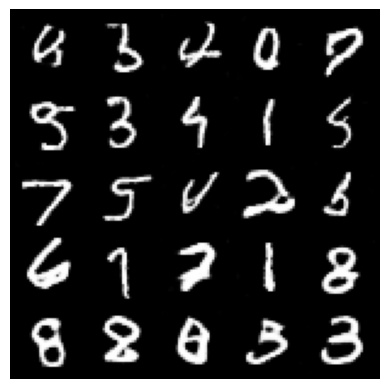

Epoch [52/100], Batch [100/600], D_real: 0.8445, D_fake: 0.1926, Loss_D: 0.4940, Loss_G: 3.0734
Epoch [52/100], Batch [200/600], D_real: 0.9178, D_fake: 0.2432, Loss_D: 0.4638, Loss_G: 2.5364
Epoch [52/100], Batch [300/600], D_real: 0.9528, D_fake: 0.3014, Loss_D: 0.5555, Loss_G: 2.8392
Epoch [52/100], Batch [400/600], D_real: 0.8474, D_fake: 0.1116, Loss_D: 0.3704, Loss_G: 2.7218
Epoch [52/100], Batch [500/600], D_real: 0.7337, D_fake: 0.1546, Loss_D: 0.6166, Loss_G: 2.8713
Epoch [52/100], Batch [600/600], D_real: 0.7143, D_fake: 0.0752, Loss_D: 0.4911, Loss_G: 2.7212


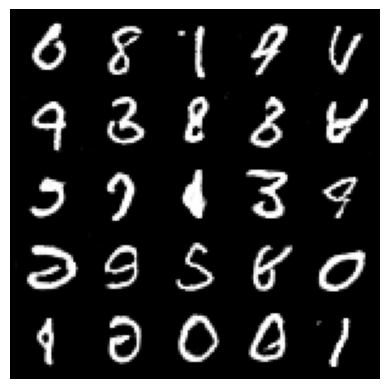

Epoch [53/100], Batch [100/600], D_real: 0.8070, D_fake: 0.0854, Loss_D: 0.3715, Loss_G: 2.3884
Epoch [53/100], Batch [200/600], D_real: 0.8400, D_fake: 0.1825, Loss_D: 0.4538, Loss_G: 3.0014
Epoch [53/100], Batch [300/600], D_real: 0.9133, D_fake: 0.2058, Loss_D: 0.3893, Loss_G: 2.1703
Epoch [53/100], Batch [400/600], D_real: 0.8456, D_fake: 0.0952, Loss_D: 0.3410, Loss_G: 3.2043
Epoch [53/100], Batch [500/600], D_real: 0.9063, D_fake: 0.2117, Loss_D: 0.3953, Loss_G: 2.2374
Epoch [53/100], Batch [600/600], D_real: 0.9046, D_fake: 0.2868, Loss_D: 0.5500, Loss_G: 3.1078


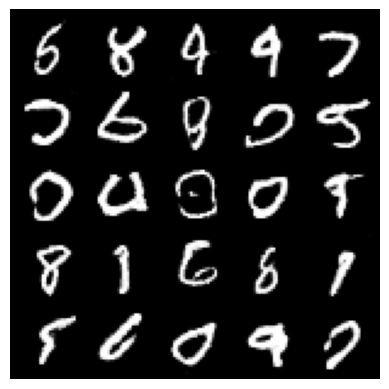

Epoch [54/100], Batch [100/600], D_real: 0.9391, D_fake: 0.2479, Loss_D: 0.4193, Loss_G: 3.6319
Epoch [54/100], Batch [200/600], D_real: 0.8728, D_fake: 0.1649, Loss_D: 0.3916, Loss_G: 2.8339
Epoch [54/100], Batch [300/600], D_real: 0.7510, D_fake: 0.0836, Loss_D: 0.4817, Loss_G: 3.4270
Epoch [54/100], Batch [400/600], D_real: 0.9531, D_fake: 0.2060, Loss_D: 0.3604, Loss_G: 2.7295
Epoch [54/100], Batch [500/600], D_real: 0.9257, D_fake: 0.3126, Loss_D: 0.5899, Loss_G: 2.7705
Epoch [54/100], Batch [600/600], D_real: 0.7183, D_fake: 0.0618, Loss_D: 0.4868, Loss_G: 3.5556


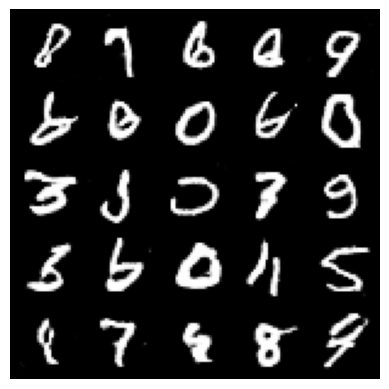

Epoch [55/100], Batch [100/600], D_real: 0.6567, D_fake: 0.1122, Loss_D: 0.6791, Loss_G: 2.3662
Epoch [55/100], Batch [200/600], D_real: 0.9249, D_fake: 0.2504, Loss_D: 0.4544, Loss_G: 2.2517
Epoch [55/100], Batch [300/600], D_real: 0.8989, D_fake: 0.2487, Loss_D: 0.4862, Loss_G: 2.3079
Epoch [55/100], Batch [400/600], D_real: 0.8586, D_fake: 0.1459, Loss_D: 0.3730, Loss_G: 3.5522
Epoch [55/100], Batch [500/600], D_real: 0.9582, D_fake: 0.2757, Loss_D: 0.4810, Loss_G: 1.9994
Epoch [55/100], Batch [600/600], D_real: 0.7184, D_fake: 0.1164, Loss_D: 0.5594, Loss_G: 1.6941


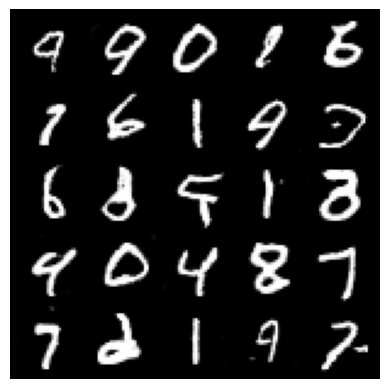

Epoch [56/100], Batch [100/600], D_real: 0.9259, D_fake: 0.2434, Loss_D: 0.4487, Loss_G: 2.2801
Epoch [56/100], Batch [200/600], D_real: 0.8753, D_fake: 0.1190, Loss_D: 0.3033, Loss_G: 3.1465
Epoch [56/100], Batch [300/600], D_real: 0.8916, D_fake: 0.1428, Loss_D: 0.3225, Loss_G: 2.9176
Epoch [56/100], Batch [400/600], D_real: 0.8959, D_fake: 0.1840, Loss_D: 0.3715, Loss_G: 3.4878
Epoch [56/100], Batch [500/600], D_real: 0.7545, D_fake: 0.1555, Loss_D: 0.5785, Loss_G: 3.2498
Epoch [56/100], Batch [600/600], D_real: 0.8521, D_fake: 0.1194, Loss_D: 0.3360, Loss_G: 3.1868


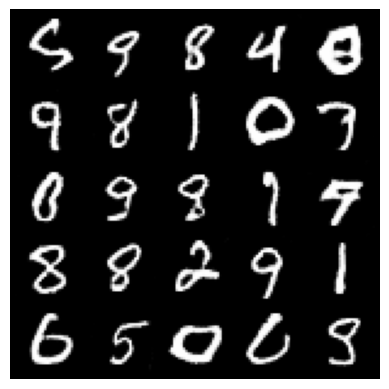

Epoch [57/100], Batch [100/600], D_real: 0.8951, D_fake: 0.1458, Loss_D: 0.3156, Loss_G: 2.6906
Epoch [57/100], Batch [200/600], D_real: 0.8788, D_fake: 0.1844, Loss_D: 0.3987, Loss_G: 2.1811
Epoch [57/100], Batch [300/600], D_real: 0.7615, D_fake: 0.0996, Loss_D: 0.4671, Loss_G: 3.5752
Epoch [57/100], Batch [400/600], D_real: 0.7530, D_fake: 0.1230, Loss_D: 0.5100, Loss_G: 1.9934
Epoch [57/100], Batch [500/600], D_real: 0.8604, D_fake: 0.1345, Loss_D: 0.3577, Loss_G: 2.7425
Epoch [57/100], Batch [600/600], D_real: 0.9057, D_fake: 0.2682, Loss_D: 0.5338, Loss_G: 2.9874


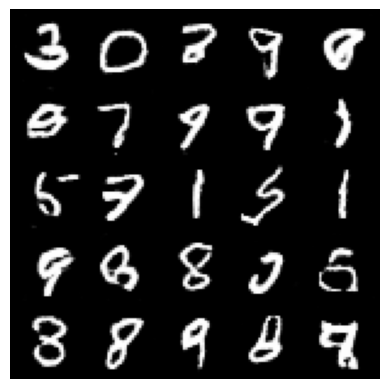

Epoch [58/100], Batch [100/600], D_real: 0.6979, D_fake: 0.0644, Loss_D: 0.4998, Loss_G: 2.5457
Epoch [58/100], Batch [200/600], D_real: 0.9369, D_fake: 0.3074, Loss_D: 0.5753, Loss_G: 3.0339
Epoch [58/100], Batch [300/600], D_real: 0.8929, D_fake: 0.1923, Loss_D: 0.4031, Loss_G: 2.2958
Epoch [58/100], Batch [400/600], D_real: 0.8995, D_fake: 0.1055, Loss_D: 0.2576, Loss_G: 2.8385
Epoch [58/100], Batch [500/600], D_real: 0.8236, D_fake: 0.0860, Loss_D: 0.3292, Loss_G: 3.0738
Epoch [58/100], Batch [600/600], D_real: 0.8326, D_fake: 0.0736, Loss_D: 0.3261, Loss_G: 4.0092


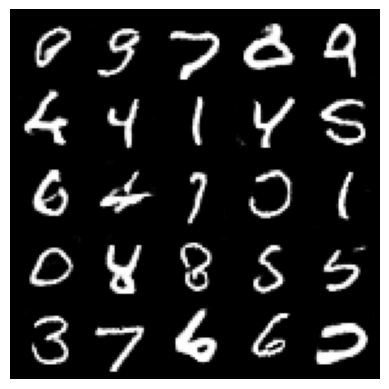

Epoch [59/100], Batch [100/600], D_real: 0.8765, D_fake: 0.1749, Loss_D: 0.3995, Loss_G: 2.9794
Epoch [59/100], Batch [200/600], D_real: 0.7427, D_fake: 0.0942, Loss_D: 0.5097, Loss_G: 2.5976
Epoch [59/100], Batch [300/600], D_real: 0.8740, D_fake: 0.1633, Loss_D: 0.3579, Loss_G: 2.5014
Epoch [59/100], Batch [400/600], D_real: 0.8155, D_fake: 0.1234, Loss_D: 0.3981, Loss_G: 3.1090
Epoch [59/100], Batch [500/600], D_real: 0.8674, D_fake: 0.1337, Loss_D: 0.3425, Loss_G: 3.3434
Epoch [59/100], Batch [600/600], D_real: 0.8617, D_fake: 0.1609, Loss_D: 0.3818, Loss_G: 2.5406


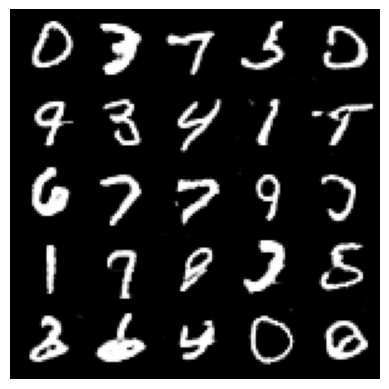

Epoch [60/100], Batch [100/600], D_real: 0.8690, D_fake: 0.0904, Loss_D: 0.2671, Loss_G: 2.6675
Epoch [60/100], Batch [200/600], D_real: 0.8510, D_fake: 0.1176, Loss_D: 0.3496, Loss_G: 4.1331
Epoch [60/100], Batch [300/600], D_real: 0.9186, D_fake: 0.1882, Loss_D: 0.3600, Loss_G: 3.5762
Epoch [60/100], Batch [400/600], D_real: 0.7936, D_fake: 0.0652, Loss_D: 0.3521, Loss_G: 3.3506
Epoch [60/100], Batch [500/600], D_real: 0.8006, D_fake: 0.0770, Loss_D: 0.3705, Loss_G: 3.7770
Epoch [60/100], Batch [600/600], D_real: 0.7065, D_fake: 0.0372, Loss_D: 0.5111, Loss_G: 4.3712


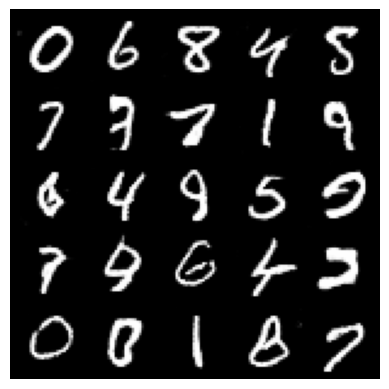

Epoch [61/100], Batch [100/600], D_real: 0.9044, D_fake: 0.1271, Loss_D: 0.2907, Loss_G: 2.9889
Epoch [61/100], Batch [200/600], D_real: 0.8658, D_fake: 0.1595, Loss_D: 0.3826, Loss_G: 2.8095
Epoch [61/100], Batch [300/600], D_real: 0.7894, D_fake: 0.0684, Loss_D: 0.3796, Loss_G: 3.6287
Epoch [61/100], Batch [400/600], D_real: 0.9162, D_fake: 0.1654, Loss_D: 0.3162, Loss_G: 2.1112
Epoch [61/100], Batch [500/600], D_real: 0.8716, D_fake: 0.2225, Loss_D: 0.4762, Loss_G: 2.8974
Epoch [61/100], Batch [600/600], D_real: 0.8073, D_fake: 0.1545, Loss_D: 0.4751, Loss_G: 2.3133


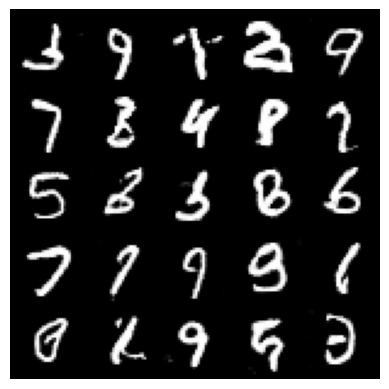

Epoch [62/100], Batch [100/600], D_real: 0.7235, D_fake: 0.0442, Loss_D: 0.4689, Loss_G: 3.2370
Epoch [62/100], Batch [200/600], D_real: 0.9197, D_fake: 0.2124, Loss_D: 0.3925, Loss_G: 1.7991
Epoch [62/100], Batch [300/600], D_real: 0.8479, D_fake: 0.1799, Loss_D: 0.4469, Loss_G: 1.9746
Epoch [62/100], Batch [400/600], D_real: 0.6892, D_fake: 0.1174, Loss_D: 0.6650, Loss_G: 2.2009
Epoch [62/100], Batch [500/600], D_real: 0.9529, D_fake: 0.3294, Loss_D: 0.6100, Loss_G: 3.2024
Epoch [62/100], Batch [600/600], D_real: 0.7726, D_fake: 0.0812, Loss_D: 0.4052, Loss_G: 2.7192


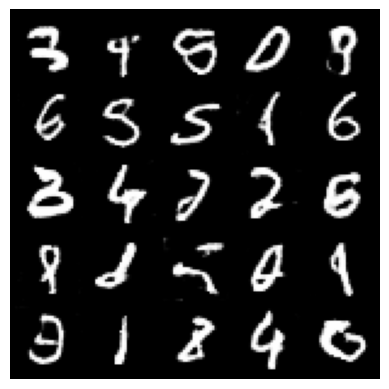

Epoch [63/100], Batch [100/600], D_real: 0.8569, D_fake: 0.1685, Loss_D: 0.4091, Loss_G: 2.7473
Epoch [63/100], Batch [200/600], D_real: 0.8896, D_fake: 0.1268, Loss_D: 0.2996, Loss_G: 3.2181
Epoch [63/100], Batch [300/600], D_real: 0.6708, D_fake: 0.0376, Loss_D: 0.5756, Loss_G: 3.4507
Epoch [63/100], Batch [400/600], D_real: 0.9297, D_fake: 0.3436, Loss_D: 0.6763, Loss_G: 1.6550
Epoch [63/100], Batch [500/600], D_real: 0.7617, D_fake: 0.1080, Loss_D: 0.4723, Loss_G: 2.3537
Epoch [63/100], Batch [600/600], D_real: 0.8867, D_fake: 0.3082, Loss_D: 0.6483, Loss_G: 2.4192


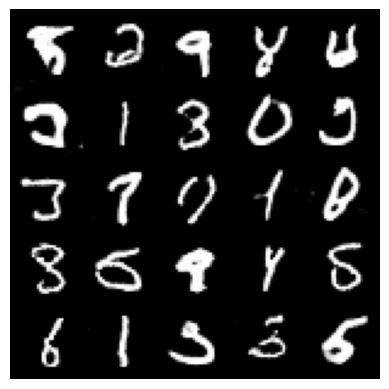

Epoch [64/100], Batch [100/600], D_real: 0.8189, D_fake: 0.1345, Loss_D: 0.4303, Loss_G: 2.7317
Epoch [64/100], Batch [200/600], D_real: 0.8204, D_fake: 0.0923, Loss_D: 0.3598, Loss_G: 2.2759
Epoch [64/100], Batch [300/600], D_real: 0.8661, D_fake: 0.1891, Loss_D: 0.4373, Loss_G: 2.1057
Epoch [64/100], Batch [400/600], D_real: 0.9413, D_fake: 0.3905, Loss_D: 0.7577, Loss_G: 2.5817
Epoch [64/100], Batch [500/600], D_real: 0.7634, D_fake: 0.1563, Loss_D: 0.5359, Loss_G: 1.9643
Epoch [64/100], Batch [600/600], D_real: 0.8541, D_fake: 0.2190, Loss_D: 0.4913, Loss_G: 1.9199


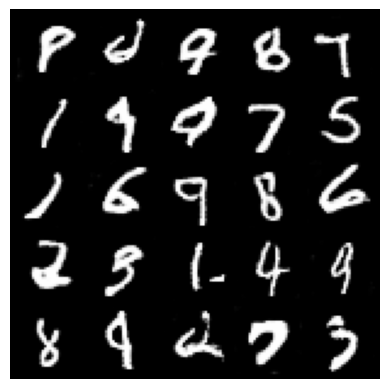

Epoch [65/100], Batch [100/600], D_real: 0.7420, D_fake: 0.0511, Loss_D: 0.4316, Loss_G: 4.2455
Epoch [65/100], Batch [200/600], D_real: 0.8332, D_fake: 0.1754, Loss_D: 0.4916, Loss_G: 2.9665
Epoch [65/100], Batch [300/600], D_real: 0.8991, D_fake: 0.2000, Loss_D: 0.4141, Loss_G: 2.6521
Epoch [65/100], Batch [400/600], D_real: 0.9804, D_fake: 0.3980, Loss_D: 0.7415, Loss_G: 2.2739
Epoch [65/100], Batch [500/600], D_real: 0.7271, D_fake: 0.0728, Loss_D: 0.4971, Loss_G: 3.2706
Epoch [65/100], Batch [600/600], D_real: 0.6877, D_fake: 0.0334, Loss_D: 0.5074, Loss_G: 3.9288


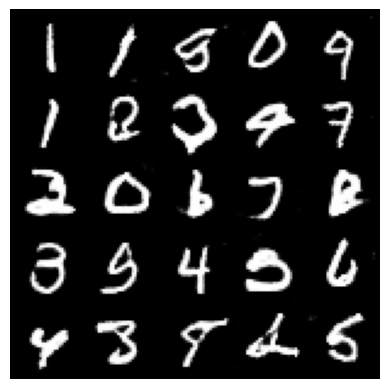

Epoch [66/100], Batch [100/600], D_real: 0.6879, D_fake: 0.1049, Loss_D: 0.6077, Loss_G: 3.8673
Epoch [66/100], Batch [200/600], D_real: 0.8688, D_fake: 0.1360, Loss_D: 0.3385, Loss_G: 3.4947
Epoch [66/100], Batch [300/600], D_real: 0.6589, D_fake: 0.0847, Loss_D: 0.6167, Loss_G: 1.6417
Epoch [66/100], Batch [400/600], D_real: 0.9273, D_fake: 0.1672, Loss_D: 0.3029, Loss_G: 2.1614
Epoch [66/100], Batch [500/600], D_real: 0.9016, D_fake: 0.1668, Loss_D: 0.3589, Loss_G: 3.6583
Epoch [66/100], Batch [600/600], D_real: 0.8719, D_fake: 0.2023, Loss_D: 0.4312, Loss_G: 2.2194


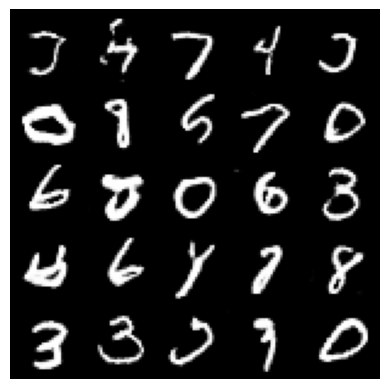

Epoch [67/100], Batch [100/600], D_real: 0.8931, D_fake: 0.1502, Loss_D: 0.3290, Loss_G: 2.8292
Epoch [67/100], Batch [200/600], D_real: 0.8363, D_fake: 0.1841, Loss_D: 0.4696, Loss_G: 2.7990
Epoch [67/100], Batch [300/600], D_real: 0.8653, D_fake: 0.1295, Loss_D: 0.3424, Loss_G: 3.9185
Epoch [67/100], Batch [400/600], D_real: 0.8612, D_fake: 0.1498, Loss_D: 0.3700, Loss_G: 2.4340
Epoch [67/100], Batch [500/600], D_real: 0.9232, D_fake: 0.2266, Loss_D: 0.4003, Loss_G: 2.5611
Epoch [67/100], Batch [600/600], D_real: 0.6843, D_fake: 0.0643, Loss_D: 0.5571, Loss_G: 3.3033


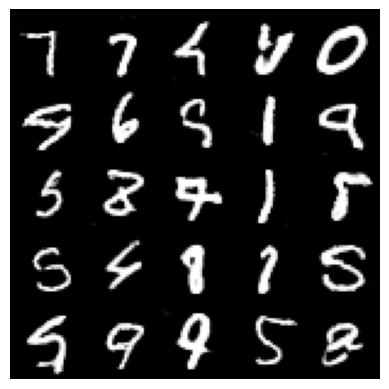

Epoch [68/100], Batch [100/600], D_real: 0.7198, D_fake: 0.0491, Loss_D: 0.4643, Loss_G: 3.7756
Epoch [68/100], Batch [200/600], D_real: 0.9015, D_fake: 0.0604, Loss_D: 0.1837, Loss_G: 3.8404
Epoch [68/100], Batch [300/600], D_real: 0.7367, D_fake: 0.0485, Loss_D: 0.4438, Loss_G: 4.0008
Epoch [68/100], Batch [400/600], D_real: 0.9277, D_fake: 0.1436, Loss_D: 0.2639, Loss_G: 3.2931
Epoch [68/100], Batch [500/600], D_real: 0.9099, D_fake: 0.1318, Loss_D: 0.2636, Loss_G: 3.9208
Epoch [68/100], Batch [600/600], D_real: 0.8588, D_fake: 0.1210, Loss_D: 0.3319, Loss_G: 3.4404


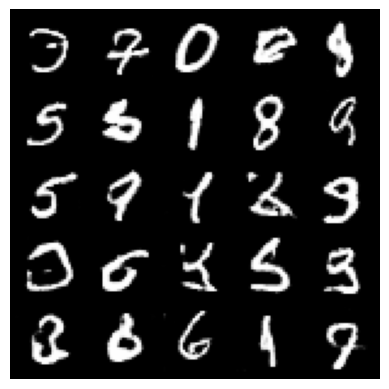

Epoch [69/100], Batch [100/600], D_real: 0.6999, D_fake: 0.0190, Loss_D: 0.4760, Loss_G: 5.2709
Epoch [69/100], Batch [200/600], D_real: 0.8573, D_fake: 0.1160, Loss_D: 0.3287, Loss_G: 3.8857
Epoch [69/100], Batch [300/600], D_real: 0.8804, D_fake: 0.1573, Loss_D: 0.3574, Loss_G: 2.3261
Epoch [69/100], Batch [400/600], D_real: 0.8511, D_fake: 0.1082, Loss_D: 0.3497, Loss_G: 2.8195
Epoch [69/100], Batch [500/600], D_real: 0.9527, D_fake: 0.3104, Loss_D: 0.5548, Loss_G: 3.6739
Epoch [69/100], Batch [600/600], D_real: 0.8885, D_fake: 0.1333, Loss_D: 0.3076, Loss_G: 3.2434


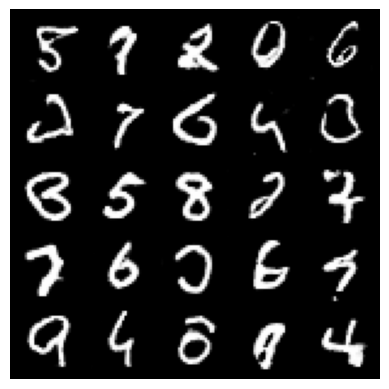

Epoch [70/100], Batch [100/600], D_real: 0.9374, D_fake: 0.0976, Loss_D: 0.2022, Loss_G: 3.5514
Epoch [70/100], Batch [200/600], D_real: 0.5602, D_fake: 0.0806, Loss_D: 0.8486, Loss_G: 1.9613
Epoch [70/100], Batch [300/600], D_real: 0.8811, D_fake: 0.1330, Loss_D: 0.3125, Loss_G: 3.0326
Epoch [70/100], Batch [400/600], D_real: 0.8766, D_fake: 0.1446, Loss_D: 0.3829, Loss_G: 3.3567
Epoch [70/100], Batch [500/600], D_real: 0.8999, D_fake: 0.1642, Loss_D: 0.3258, Loss_G: 3.5010
Epoch [70/100], Batch [600/600], D_real: 0.8786, D_fake: 0.1207, Loss_D: 0.3135, Loss_G: 2.9448


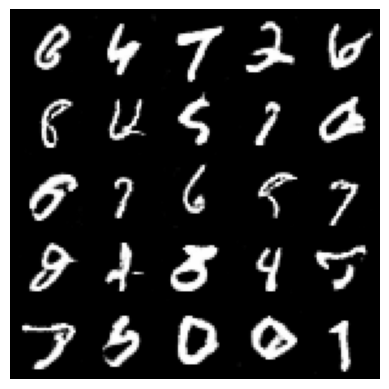

Epoch [71/100], Batch [100/600], D_real: 0.6403, D_fake: 0.0698, Loss_D: 0.6588, Loss_G: 2.7202
Epoch [71/100], Batch [200/600], D_real: 0.9057, D_fake: 0.1945, Loss_D: 0.3879, Loss_G: 1.7153
Epoch [71/100], Batch [300/600], D_real: 0.9226, D_fake: 0.1525, Loss_D: 0.2961, Loss_G: 2.9916
Epoch [71/100], Batch [400/600], D_real: 0.8674, D_fake: 0.1265, Loss_D: 0.3261, Loss_G: 1.9644
Epoch [71/100], Batch [500/600], D_real: 0.9069, D_fake: 0.1809, Loss_D: 0.3513, Loss_G: 2.5365
Epoch [71/100], Batch [600/600], D_real: 0.8117, D_fake: 0.0986, Loss_D: 0.3840, Loss_G: 1.9291


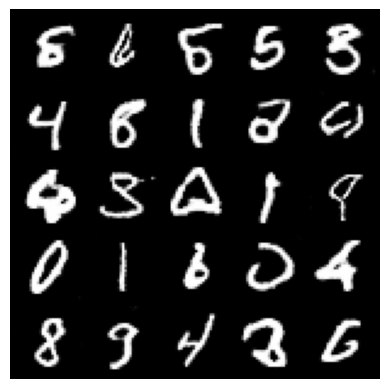

Epoch [72/100], Batch [100/600], D_real: 0.9464, D_fake: 0.3211, Loss_D: 0.6046, Loss_G: 2.9244
Epoch [72/100], Batch [200/600], D_real: 0.7483, D_fake: 0.0847, Loss_D: 0.4503, Loss_G: 3.2484
Epoch [72/100], Batch [300/600], D_real: 0.9347, D_fake: 0.1878, Loss_D: 0.3686, Loss_G: 3.1756
Epoch [72/100], Batch [400/600], D_real: 0.7874, D_fake: 0.1060, Loss_D: 0.4344, Loss_G: 2.9391
Epoch [72/100], Batch [500/600], D_real: 0.8954, D_fake: 0.1657, Loss_D: 0.3432, Loss_G: 3.0970
Epoch [72/100], Batch [600/600], D_real: 0.8695, D_fake: 0.1886, Loss_D: 0.4344, Loss_G: 3.2183


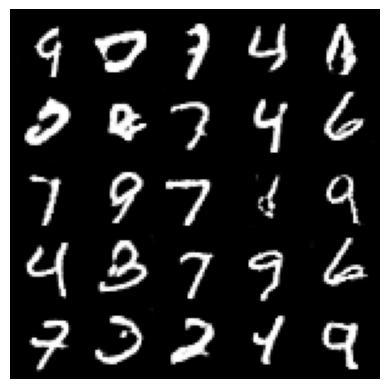

Epoch [73/100], Batch [100/600], D_real: 0.8068, D_fake: 0.1348, Loss_D: 0.4400, Loss_G: 4.0410
Epoch [73/100], Batch [200/600], D_real: 0.8806, D_fake: 0.1037, Loss_D: 0.2728, Loss_G: 3.0728
Epoch [73/100], Batch [300/600], D_real: 0.7742, D_fake: 0.0963, Loss_D: 0.4598, Loss_G: 3.5813
Epoch [73/100], Batch [400/600], D_real: 0.8384, D_fake: 0.1839, Loss_D: 0.4652, Loss_G: 1.5840
Epoch [73/100], Batch [500/600], D_real: 0.8460, D_fake: 0.0810, Loss_D: 0.2953, Loss_G: 3.6565
Epoch [73/100], Batch [600/600], D_real: 0.8319, D_fake: 0.1420, Loss_D: 0.4302, Loss_G: 4.0905


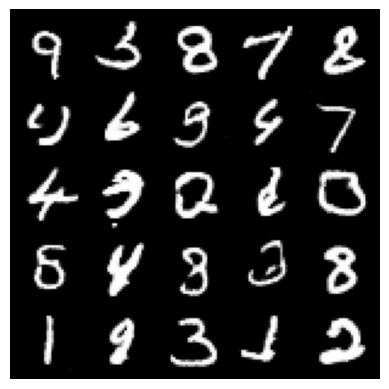

Epoch [74/100], Batch [100/600], D_real: 0.8957, D_fake: 0.1203, Loss_D: 0.2748, Loss_G: 3.3666
Epoch [74/100], Batch [200/600], D_real: 0.6815, D_fake: 0.0787, Loss_D: 0.6019, Loss_G: 3.1542
Epoch [74/100], Batch [300/600], D_real: 0.9114, D_fake: 0.1564, Loss_D: 0.3276, Loss_G: 3.4346
Epoch [74/100], Batch [400/600], D_real: 0.6510, D_fake: 0.0798, Loss_D: 0.6785, Loss_G: 2.9651
Epoch [74/100], Batch [500/600], D_real: 0.8705, D_fake: 0.1662, Loss_D: 0.3926, Loss_G: 1.9655
Epoch [74/100], Batch [600/600], D_real: 0.8556, D_fake: 0.0846, Loss_D: 0.2970, Loss_G: 3.2371


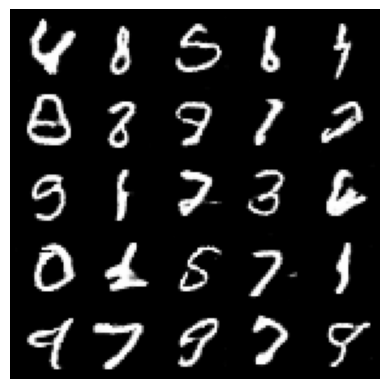

Epoch [75/100], Batch [100/600], D_real: 0.6123, D_fake: 0.0533, Loss_D: 0.7308, Loss_G: 3.0126
Epoch [75/100], Batch [200/600], D_real: 0.8449, D_fake: 0.1610, Loss_D: 0.4050, Loss_G: 2.5653
Epoch [75/100], Batch [300/600], D_real: 0.9228, D_fake: 0.1678, Loss_D: 0.3188, Loss_G: 2.8255
Epoch [75/100], Batch [400/600], D_real: 0.6591, D_fake: 0.0413, Loss_D: 0.6170, Loss_G: 3.6618
Epoch [75/100], Batch [500/600], D_real: 0.9094, D_fake: 0.2124, Loss_D: 0.4110, Loss_G: 2.7197
Epoch [75/100], Batch [600/600], D_real: 0.8149, D_fake: 0.1762, Loss_D: 0.5237, Loss_G: 2.4889


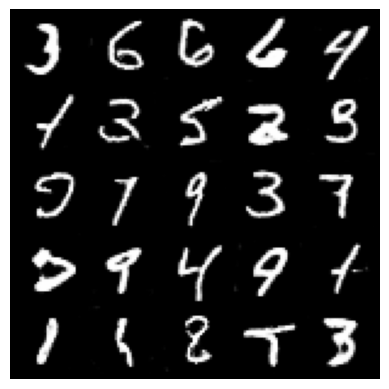

Epoch [76/100], Batch [100/600], D_real: 0.9035, D_fake: 0.1715, Loss_D: 0.3384, Loss_G: 2.6981
Epoch [76/100], Batch [200/600], D_real: 0.9413, D_fake: 0.4286, Loss_D: 0.8838, Loss_G: 1.2866
Epoch [76/100], Batch [300/600], D_real: 0.7698, D_fake: 0.0741, Loss_D: 0.4246, Loss_G: 3.4381
Epoch [76/100], Batch [400/600], D_real: 0.9362, D_fake: 0.2784, Loss_D: 0.5256, Loss_G: 2.6468
Epoch [76/100], Batch [500/600], D_real: 0.8931, D_fake: 0.1250, Loss_D: 0.2858, Loss_G: 2.8682
Epoch [76/100], Batch [600/600], D_real: 0.8964, D_fake: 0.2948, Loss_D: 0.5948, Loss_G: 3.4953


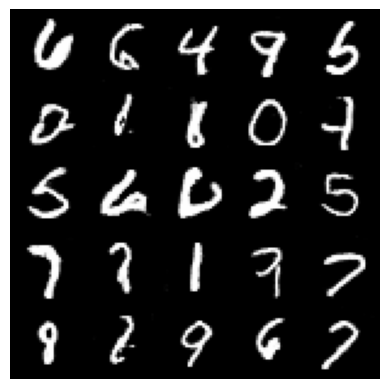

Epoch [77/100], Batch [100/600], D_real: 0.8435, D_fake: 0.0875, Loss_D: 0.3068, Loss_G: 3.5190
Epoch [77/100], Batch [200/600], D_real: 0.8758, D_fake: 0.0558, Loss_D: 0.2245, Loss_G: 4.2600
Epoch [77/100], Batch [300/600], D_real: 0.8439, D_fake: 0.1541, Loss_D: 0.4134, Loss_G: 2.6057
Epoch [77/100], Batch [400/600], D_real: 0.6901, D_fake: 0.0428, Loss_D: 0.5486, Loss_G: 3.8937
Epoch [77/100], Batch [500/600], D_real: 0.8082, D_fake: 0.2287, Loss_D: 0.6220, Loss_G: 3.0606
Epoch [77/100], Batch [600/600], D_real: 0.9490, D_fake: 0.2117, Loss_D: 0.3514, Loss_G: 3.1314


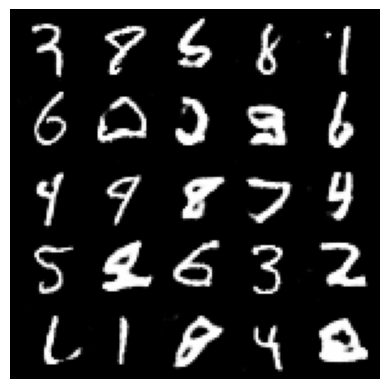

Epoch [78/100], Batch [100/600], D_real: 0.8997, D_fake: 0.2088, Loss_D: 0.4112, Loss_G: 3.5329
Epoch [78/100], Batch [200/600], D_real: 0.9944, D_fake: 0.5406, Loss_D: 1.1150, Loss_G: 1.4019
Epoch [78/100], Batch [300/600], D_real: 0.9066, D_fake: 0.0689, Loss_D: 0.1939, Loss_G: 3.4043
Epoch [78/100], Batch [400/600], D_real: 0.9318, D_fake: 0.1745, Loss_D: 0.3177, Loss_G: 2.3434
Epoch [78/100], Batch [500/600], D_real: 0.8236, D_fake: 0.1083, Loss_D: 0.3861, Loss_G: 3.5794
Epoch [78/100], Batch [600/600], D_real: 0.8616, D_fake: 0.1852, Loss_D: 0.4234, Loss_G: 2.5402


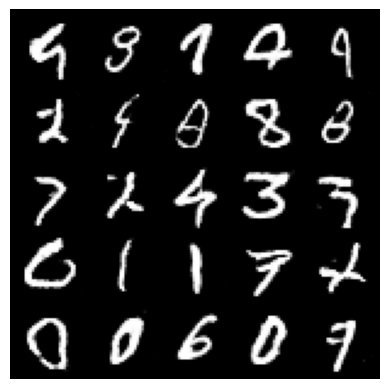

Epoch [79/100], Batch [100/600], D_real: 0.8382, D_fake: 0.1326, Loss_D: 0.4035, Loss_G: 2.6766
Epoch [79/100], Batch [200/600], D_real: 0.9009, D_fake: 0.2357, Loss_D: 0.4501, Loss_G: 2.8660
Epoch [79/100], Batch [300/600], D_real: 0.9105, D_fake: 0.1811, Loss_D: 0.3582, Loss_G: 3.3432
Epoch [79/100], Batch [400/600], D_real: 0.8174, D_fake: 0.0868, Loss_D: 0.3526, Loss_G: 2.8540
Epoch [79/100], Batch [500/600], D_real: 0.8832, D_fake: 0.1948, Loss_D: 0.3980, Loss_G: 2.6635
Epoch [79/100], Batch [600/600], D_real: 0.8431, D_fake: 0.0625, Loss_D: 0.2791, Loss_G: 3.4943


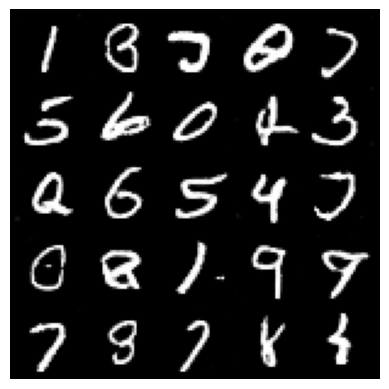

Epoch [80/100], Batch [100/600], D_real: 0.8658, D_fake: 0.1450, Loss_D: 0.3656, Loss_G: 3.8578
Epoch [80/100], Batch [200/600], D_real: 0.8057, D_fake: 0.1549, Loss_D: 0.4520, Loss_G: 2.0788
Epoch [80/100], Batch [300/600], D_real: 0.9439, D_fake: 0.2482, Loss_D: 0.4621, Loss_G: 2.8806
Epoch [80/100], Batch [400/600], D_real: 0.7562, D_fake: 0.0666, Loss_D: 0.4132, Loss_G: 3.6410
Epoch [80/100], Batch [500/600], D_real: 0.7122, D_fake: 0.0705, Loss_D: 0.5044, Loss_G: 3.7319
Epoch [80/100], Batch [600/600], D_real: 0.8679, D_fake: 0.1235, Loss_D: 0.3248, Loss_G: 3.6590


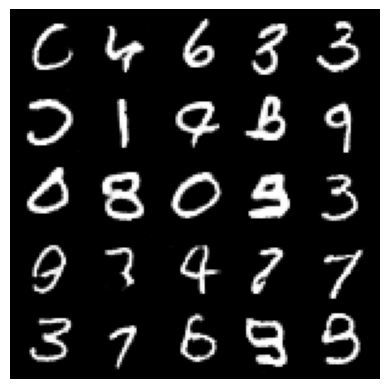

Epoch [81/100], Batch [100/600], D_real: 0.9252, D_fake: 0.1906, Loss_D: 0.3654, Loss_G: 3.3370
Epoch [81/100], Batch [200/600], D_real: 0.8517, D_fake: 0.0633, Loss_D: 0.2580, Loss_G: 2.2169
Epoch [81/100], Batch [300/600], D_real: 0.7901, D_fake: 0.1028, Loss_D: 0.4135, Loss_G: 3.6582
Epoch [81/100], Batch [400/600], D_real: 0.7548, D_fake: 0.1171, Loss_D: 0.4867, Loss_G: 2.9485
Epoch [81/100], Batch [500/600], D_real: 0.7007, D_fake: 0.0853, Loss_D: 0.5548, Loss_G: 2.6328
Epoch [81/100], Batch [600/600], D_real: 0.8634, D_fake: 0.0949, Loss_D: 0.2854, Loss_G: 3.4875


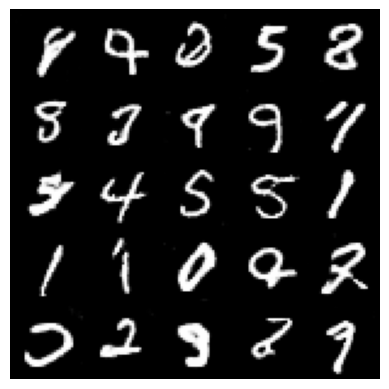

Epoch [82/100], Batch [100/600], D_real: 0.7938, D_fake: 0.0810, Loss_D: 0.3716, Loss_G: 3.2287
Epoch [82/100], Batch [200/600], D_real: 0.9210, D_fake: 0.2374, Loss_D: 0.4346, Loss_G: 2.9825
Epoch [82/100], Batch [300/600], D_real: 0.7515, D_fake: 0.0570, Loss_D: 0.4000, Loss_G: 4.2852
Epoch [82/100], Batch [400/600], D_real: 0.8479, D_fake: 0.2138, Loss_D: 0.5072, Loss_G: 2.7059
Epoch [82/100], Batch [500/600], D_real: 0.7302, D_fake: 0.0685, Loss_D: 0.4934, Loss_G: 2.4951
Epoch [82/100], Batch [600/600], D_real: 0.8768, D_fake: 0.1273, Loss_D: 0.3385, Loss_G: 3.6185


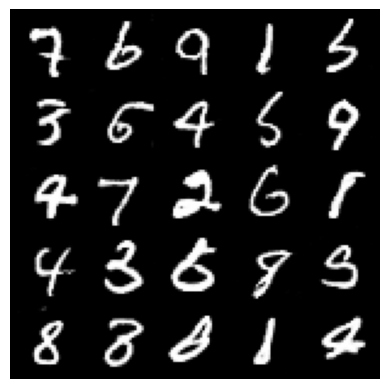

Epoch [83/100], Batch [100/600], D_real: 0.8580, D_fake: 0.0940, Loss_D: 0.2954, Loss_G: 3.5841
Epoch [83/100], Batch [200/600], D_real: 0.8955, D_fake: 0.1321, Loss_D: 0.2909, Loss_G: 3.0844
Epoch [83/100], Batch [300/600], D_real: 0.8481, D_fake: 0.0981, Loss_D: 0.3201, Loss_G: 2.9520
Epoch [83/100], Batch [400/600], D_real: 0.9069, D_fake: 0.2016, Loss_D: 0.3902, Loss_G: 2.9015
Epoch [83/100], Batch [500/600], D_real: 0.9445, D_fake: 0.2171, Loss_D: 0.3886, Loss_G: 3.0721
Epoch [83/100], Batch [600/600], D_real: 0.8871, D_fake: 0.0670, Loss_D: 0.2202, Loss_G: 2.7416


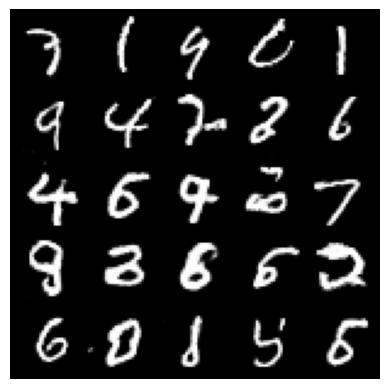

Epoch [84/100], Batch [100/600], D_real: 0.9881, D_fake: 0.3151, Loss_D: 0.5482, Loss_G: 2.0075
Epoch [84/100], Batch [200/600], D_real: 0.9606, D_fake: 0.2552, Loss_D: 0.4064, Loss_G: 3.4983
Epoch [84/100], Batch [300/600], D_real: 0.9550, D_fake: 0.1558, Loss_D: 0.2435, Loss_G: 2.5480
Epoch [84/100], Batch [400/600], D_real: 0.9033, D_fake: 0.1482, Loss_D: 0.3063, Loss_G: 2.9924
Epoch [84/100], Batch [500/600], D_real: 0.7188, D_fake: 0.0933, Loss_D: 0.5662, Loss_G: 3.7387
Epoch [84/100], Batch [600/600], D_real: 0.8851, D_fake: 0.1265, Loss_D: 0.2941, Loss_G: 2.7634


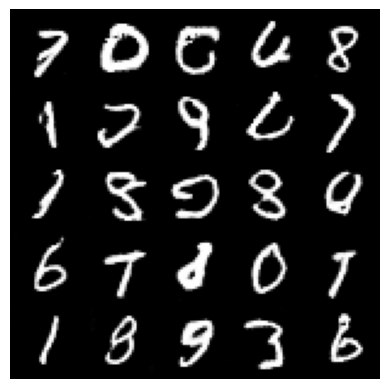

Epoch [85/100], Batch [100/600], D_real: 0.9465, D_fake: 0.1854, Loss_D: 0.3115, Loss_G: 2.6396
Epoch [85/100], Batch [200/600], D_real: 0.7987, D_fake: 0.0423, Loss_D: 0.3337, Loss_G: 3.4582
Epoch [85/100], Batch [300/600], D_real: 0.9142, D_fake: 0.2679, Loss_D: 0.5408, Loss_G: 2.7932
Epoch [85/100], Batch [400/600], D_real: 0.9496, D_fake: 0.2288, Loss_D: 0.3825, Loss_G: 2.4011
Epoch [85/100], Batch [500/600], D_real: 0.8896, D_fake: 0.0985, Loss_D: 0.2777, Loss_G: 2.8138
Epoch [85/100], Batch [600/600], D_real: 0.7890, D_fake: 0.0253, Loss_D: 0.3133, Loss_G: 1.9994


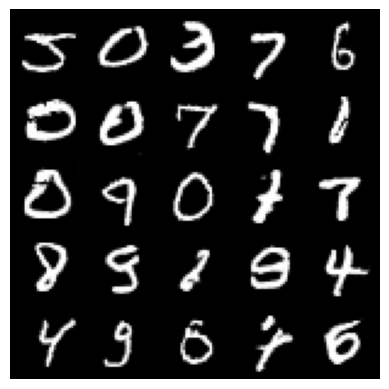

Epoch [86/100], Batch [100/600], D_real: 0.9629, D_fake: 0.1566, Loss_D: 0.2489, Loss_G: 3.6227
Epoch [86/100], Batch [200/600], D_real: 0.8159, D_fake: 0.1289, Loss_D: 0.4148, Loss_G: 3.0164
Epoch [86/100], Batch [300/600], D_real: 0.8683, D_fake: 0.1520, Loss_D: 0.3567, Loss_G: 2.8197
Epoch [86/100], Batch [400/600], D_real: 0.8975, D_fake: 0.1240, Loss_D: 0.2709, Loss_G: 4.8109
Epoch [86/100], Batch [500/600], D_real: 0.8150, D_fake: 0.1293, Loss_D: 0.4266, Loss_G: 3.0286
Epoch [86/100], Batch [600/600], D_real: 0.9059, D_fake: 0.2755, Loss_D: 0.5225, Loss_G: 1.8990


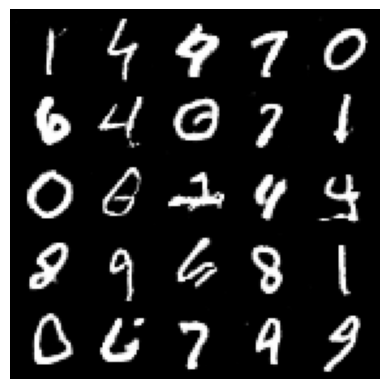

Epoch [87/100], Batch [100/600], D_real: 0.8976, D_fake: 0.0756, Loss_D: 0.2057, Loss_G: 3.2621
Epoch [87/100], Batch [200/600], D_real: 0.8138, D_fake: 0.0479, Loss_D: 0.2923, Loss_G: 3.8003
Epoch [87/100], Batch [300/600], D_real: 0.8950, D_fake: 0.1706, Loss_D: 0.3772, Loss_G: 4.0517
Epoch [87/100], Batch [400/600], D_real: 0.9483, D_fake: 0.2631, Loss_D: 0.4629, Loss_G: 3.4929
Epoch [87/100], Batch [500/600], D_real: 0.7971, D_fake: 0.0723, Loss_D: 0.3655, Loss_G: 3.1219
Epoch [87/100], Batch [600/600], D_real: 0.8130, D_fake: 0.0658, Loss_D: 0.3389, Loss_G: 3.2711


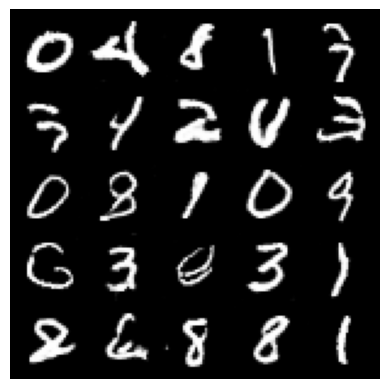

Epoch [88/100], Batch [100/600], D_real: 0.8634, D_fake: 0.1087, Loss_D: 0.3072, Loss_G: 3.1795
Epoch [88/100], Batch [200/600], D_real: 0.8567, D_fake: 0.0707, Loss_D: 0.2686, Loss_G: 3.5259
Epoch [88/100], Batch [300/600], D_real: 0.8405, D_fake: 0.0945, Loss_D: 0.3261, Loss_G: 3.6416
Epoch [88/100], Batch [400/600], D_real: 0.8596, D_fake: 0.0911, Loss_D: 0.3015, Loss_G: 3.4661
Epoch [88/100], Batch [500/600], D_real: 0.7967, D_fake: 0.0864, Loss_D: 0.3716, Loss_G: 2.3870
Epoch [88/100], Batch [600/600], D_real: 0.9672, D_fake: 0.2650, Loss_D: 0.4574, Loss_G: 3.5565


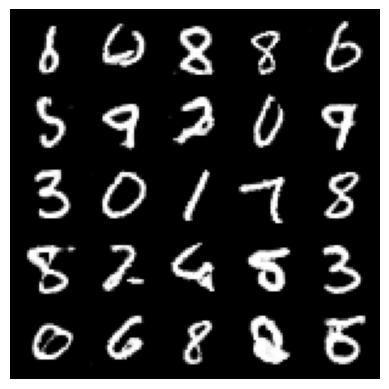

Epoch [89/100], Batch [100/600], D_real: 0.6823, D_fake: 0.1396, Loss_D: 0.6790, Loss_G: 2.4930
Epoch [89/100], Batch [200/600], D_real: 0.6557, D_fake: 0.0880, Loss_D: 0.6539, Loss_G: 3.0926
Epoch [89/100], Batch [300/600], D_real: 0.8162, D_fake: 0.1902, Loss_D: 0.5022, Loss_G: 2.1207
Epoch [89/100], Batch [400/600], D_real: 0.4738, D_fake: 0.0368, Loss_D: 1.0577, Loss_G: 2.7834
Epoch [89/100], Batch [500/600], D_real: 0.5612, D_fake: 0.0274, Loss_D: 0.7817, Loss_G: 4.7115
Epoch [89/100], Batch [600/600], D_real: 0.9534, D_fake: 0.2966, Loss_D: 0.5339, Loss_G: 2.1186


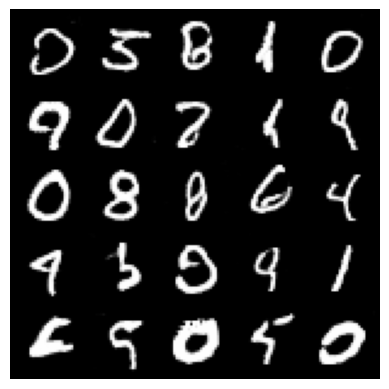

Epoch [90/100], Batch [100/600], D_real: 0.9219, D_fake: 0.1448, Loss_D: 0.2934, Loss_G: 2.9094
Epoch [90/100], Batch [200/600], D_real: 0.9511, D_fake: 0.1774, Loss_D: 0.3562, Loss_G: 2.9538
Epoch [90/100], Batch [300/600], D_real: 0.9134, D_fake: 0.1034, Loss_D: 0.2218, Loss_G: 3.3115
Epoch [90/100], Batch [400/600], D_real: 0.7976, D_fake: 0.0761, Loss_D: 0.3825, Loss_G: 3.7904
Epoch [90/100], Batch [500/600], D_real: 0.9524, D_fake: 0.2702, Loss_D: 0.4641, Loss_G: 2.7719
Epoch [90/100], Batch [600/600], D_real: 0.9101, D_fake: 0.1283, Loss_D: 0.2599, Loss_G: 2.8344


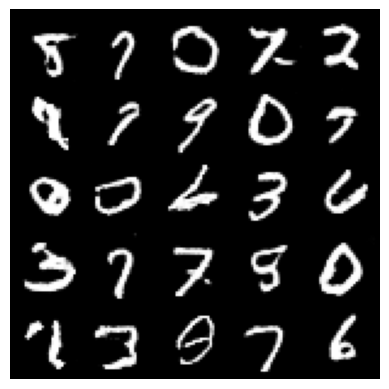

Epoch [91/100], Batch [100/600], D_real: 0.9271, D_fake: 0.1814, Loss_D: 0.3507, Loss_G: 3.1974
Epoch [91/100], Batch [200/600], D_real: 0.8286, D_fake: 0.0889, Loss_D: 0.3345, Loss_G: 3.3585
Epoch [91/100], Batch [300/600], D_real: 0.9307, D_fake: 0.2954, Loss_D: 0.5424, Loss_G: 3.2850
Epoch [91/100], Batch [400/600], D_real: 0.9193, D_fake: 0.1934, Loss_D: 0.3679, Loss_G: 3.1734
Epoch [91/100], Batch [500/600], D_real: 0.9073, D_fake: 0.1419, Loss_D: 0.2829, Loss_G: 2.0718
Epoch [91/100], Batch [600/600], D_real: 0.8396, D_fake: 0.1491, Loss_D: 0.4200, Loss_G: 3.0869


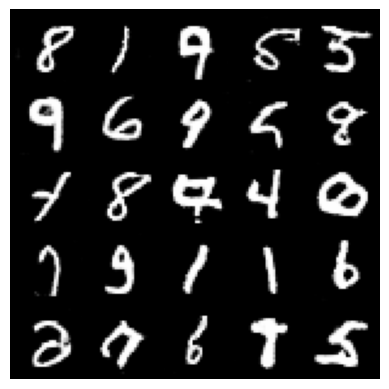

Epoch [92/100], Batch [100/600], D_real: 0.9456, D_fake: 0.2016, Loss_D: 0.3434, Loss_G: 4.1337
Epoch [92/100], Batch [200/600], D_real: 0.8595, D_fake: 0.0887, Loss_D: 0.2969, Loss_G: 2.8886
Epoch [92/100], Batch [300/600], D_real: 0.9400, D_fake: 0.1535, Loss_D: 0.2808, Loss_G: 2.2370
Epoch [92/100], Batch [400/600], D_real: 0.8973, D_fake: 0.1453, Loss_D: 0.3285, Loss_G: 3.0407
Epoch [92/100], Batch [500/600], D_real: 0.7823, D_fake: 0.0118, Loss_D: 0.3301, Loss_G: 4.1394
Epoch [92/100], Batch [600/600], D_real: 0.7309, D_fake: 0.1247, Loss_D: 0.5887, Loss_G: 2.5174


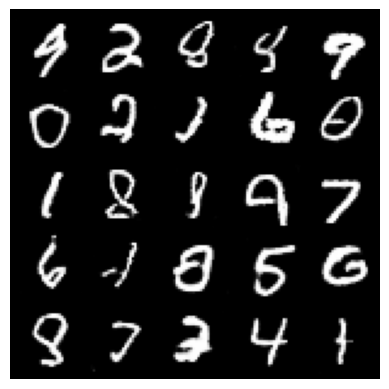

Epoch [93/100], Batch [100/600], D_real: 0.7460, D_fake: 0.0517, Loss_D: 0.4300, Loss_G: 4.1948
Epoch [93/100], Batch [200/600], D_real: 0.8494, D_fake: 0.1284, Loss_D: 0.3442, Loss_G: 2.4002
Epoch [93/100], Batch [300/600], D_real: 0.9408, D_fake: 0.1798, Loss_D: 0.3188, Loss_G: 2.4723
Epoch [93/100], Batch [400/600], D_real: 0.8147, D_fake: 0.1192, Loss_D: 0.4199, Loss_G: 3.7899
Epoch [93/100], Batch [500/600], D_real: 0.9118, D_fake: 0.1625, Loss_D: 0.3148, Loss_G: 2.5781
Epoch [93/100], Batch [600/600], D_real: 0.8697, D_fake: 0.0720, Loss_D: 0.2467, Loss_G: 3.9535


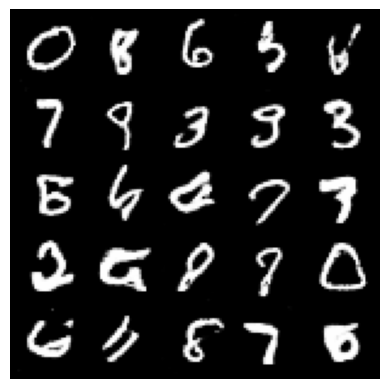

Epoch [94/100], Batch [100/600], D_real: 0.9621, D_fake: 0.3632, Loss_D: 0.7474, Loss_G: 2.7264
Epoch [94/100], Batch [200/600], D_real: 0.8800, D_fake: 0.1194, Loss_D: 0.2996, Loss_G: 3.2482
Epoch [94/100], Batch [300/600], D_real: 0.4813, D_fake: 0.0069, Loss_D: 1.0970, Loss_G: 4.5606
Epoch [94/100], Batch [400/600], D_real: 0.9036, D_fake: 0.2720, Loss_D: 0.5384, Loss_G: 2.2125
Epoch [94/100], Batch [500/600], D_real: 0.8350, D_fake: 0.1399, Loss_D: 0.3931, Loss_G: 2.7668
Epoch [94/100], Batch [600/600], D_real: 0.8871, D_fake: 0.1133, Loss_D: 0.2803, Loss_G: 3.1402


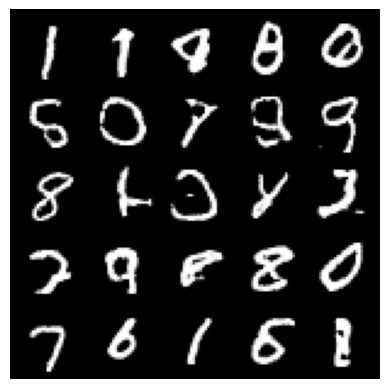

Epoch [95/100], Batch [100/600], D_real: 0.9595, D_fake: 0.3165, Loss_D: 0.5740, Loss_G: 2.6698
Epoch [95/100], Batch [200/600], D_real: 0.9055, D_fake: 0.1486, Loss_D: 0.3010, Loss_G: 3.2567
Epoch [95/100], Batch [300/600], D_real: 0.9297, D_fake: 0.1597, Loss_D: 0.3181, Loss_G: 2.9555
Epoch [95/100], Batch [400/600], D_real: 0.9164, D_fake: 0.2657, Loss_D: 0.5135, Loss_G: 2.3350
Epoch [95/100], Batch [500/600], D_real: 0.8864, D_fake: 0.1406, Loss_D: 0.3277, Loss_G: 3.9149
Epoch [95/100], Batch [600/600], D_real: 0.8815, D_fake: 0.1543, Loss_D: 0.3519, Loss_G: 2.1565


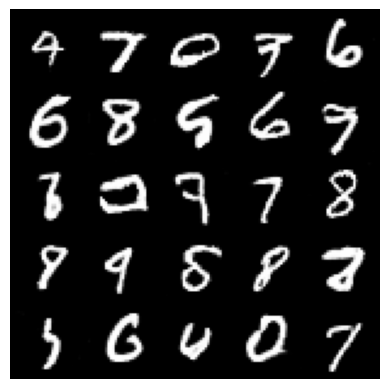

Epoch [96/100], Batch [100/600], D_real: 0.9567, D_fake: 0.2001, Loss_D: 0.3304, Loss_G: 2.5587
Epoch [96/100], Batch [200/600], D_real: 0.9274, D_fake: 0.3168, Loss_D: 0.5945, Loss_G: 1.7981
Epoch [96/100], Batch [300/600], D_real: 0.8642, D_fake: 0.1469, Loss_D: 0.3681, Loss_G: 2.7704
Epoch [96/100], Batch [400/600], D_real: 0.8495, D_fake: 0.1967, Loss_D: 0.4748, Loss_G: 2.1580
Epoch [96/100], Batch [500/600], D_real: 0.9251, D_fake: 0.2069, Loss_D: 0.3593, Loss_G: 1.8219
Epoch [96/100], Batch [600/600], D_real: 0.9377, D_fake: 0.1966, Loss_D: 0.3428, Loss_G: 2.5274


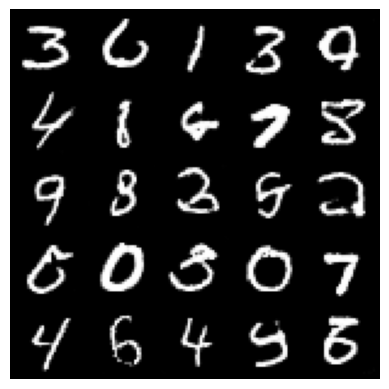

Epoch [97/100], Batch [100/600], D_real: 0.8526, D_fake: 0.0662, Loss_D: 0.2839, Loss_G: 3.3767
Epoch [97/100], Batch [200/600], D_real: 0.9628, D_fake: 0.2857, Loss_D: 0.5066, Loss_G: 2.9467
Epoch [97/100], Batch [300/600], D_real: 0.8102, D_fake: 0.0718, Loss_D: 0.3297, Loss_G: 3.5326
Epoch [97/100], Batch [400/600], D_real: 0.8842, D_fake: 0.0774, Loss_D: 0.2399, Loss_G: 3.2704
Epoch [97/100], Batch [500/600], D_real: 0.9467, D_fake: 0.1928, Loss_D: 0.3188, Loss_G: 2.5789
Epoch [97/100], Batch [600/600], D_real: 0.6568, D_fake: 0.0364, Loss_D: 0.5795, Loss_G: 3.9979


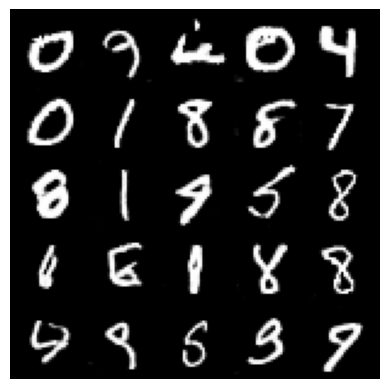

Epoch [98/100], Batch [100/600], D_real: 0.7489, D_fake: 0.0353, Loss_D: 0.3772, Loss_G: 4.8444
Epoch [98/100], Batch [200/600], D_real: 0.9049, D_fake: 0.2068, Loss_D: 0.4395, Loss_G: 2.3426
Epoch [98/100], Batch [300/600], D_real: 0.6327, D_fake: 0.0580, Loss_D: 0.6276, Loss_G: 2.5773
Epoch [98/100], Batch [400/600], D_real: 0.9504, D_fake: 0.2669, Loss_D: 0.5105, Loss_G: 2.6478
Epoch [98/100], Batch [500/600], D_real: 0.9106, D_fake: 0.1388, Loss_D: 0.2916, Loss_G: 2.3236
Epoch [98/100], Batch [600/600], D_real: 0.8779, D_fake: 0.1892, Loss_D: 0.4140, Loss_G: 2.9149


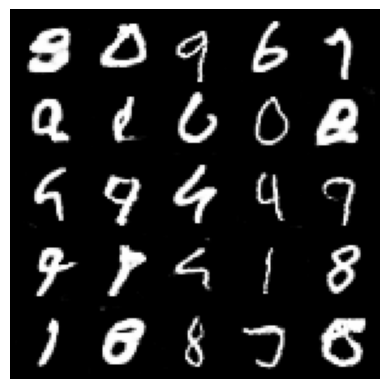

Epoch [99/100], Batch [100/600], D_real: 0.8372, D_fake: 0.0927, Loss_D: 0.3146, Loss_G: 3.6018
Epoch [99/100], Batch [200/600], D_real: 0.8631, D_fake: 0.1247, Loss_D: 0.3333, Loss_G: 2.5777
Epoch [99/100], Batch [300/600], D_real: 0.7933, D_fake: 0.0949, Loss_D: 0.4210, Loss_G: 3.2881
Epoch [99/100], Batch [400/600], D_real: 0.9057, D_fake: 0.1510, Loss_D: 0.3004, Loss_G: 2.8182
Epoch [99/100], Batch [500/600], D_real: 0.7591, D_fake: 0.0785, Loss_D: 0.4643, Loss_G: 2.9263
Epoch [99/100], Batch [600/600], D_real: 0.9496, D_fake: 0.1530, Loss_D: 0.2497, Loss_G: 3.1238


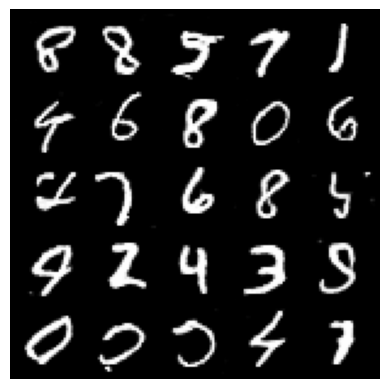

Epoch [100/100], Batch [100/600], D_real: 0.9659, D_fake: 0.1674, Loss_D: 0.2525, Loss_G: 2.9981
Epoch [100/100], Batch [200/600], D_real: 0.9017, D_fake: 0.1707, Loss_D: 0.3405, Loss_G: 3.9173
Epoch [100/100], Batch [300/600], D_real: 0.7939, D_fake: 0.0920, Loss_D: 0.3893, Loss_G: 3.5746
Epoch [100/100], Batch [400/600], D_real: 0.9137, D_fake: 0.1939, Loss_D: 0.3578, Loss_G: 2.1008
Epoch [100/100], Batch [500/600], D_real: 0.8713, D_fake: 0.3109, Loss_D: 0.6613, Loss_G: 2.5276
Epoch [100/100], Batch [600/600], D_real: 0.8027, D_fake: 0.1094, Loss_D: 0.4169, Loss_G: 3.8235


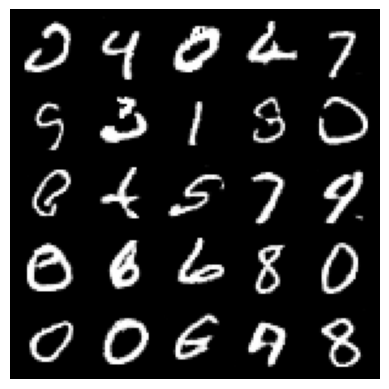

In [ ]:
#Training
for epoch in range (n_epochs):
  for i, (real_images, _) in enumerate(data_loader): #_ = labels
    real_images= real_images.to(device)
    batch_size = real_images.size(0)  #the last batch many not be of the same size



    optimizer_d.zero_grad()

    #discriminator training - real images
    label_real = torch.ones(batch_size,1).to(device)
    output_real = discriminator(real_images).view(-1,1)
    loss_real = loss_function(output_real, label_real)
    loss_real.backward()

    #generating_iamges
    noise = torch.randn(batch_size, z_dim,1,1).to(device)
    fake_images = generator(noise)

    #discriminator training - fake images
    label_fake = torch.zeros(batch_size,1).to(device)
    output_fake = discriminator(fake_images.detach()).view(-1,1) #flatten the output
    loss_fake = loss_function(output_fake, label_fake)
    loss_fake.backward()

    optimizer_d.step()

    #generator training
    optimizer_g.zero_grad()

    output = discriminator(fake_images).view (-1,1)
    loss_gen = loss_function(output, label_real) #compared the gen s against the real ones used to build
    loss_gen.backward()

    optimizer_g.step()

    if (i+1)%100 == 0:
      print(f'Epoch [{epoch+1}/{n_epochs}], Batch [{i+1}/{len(data_loader)}], '
                  f'D_real: {output_real.mean():.4f}, D_fake: {output_fake.mean():.4f}, '
                  f'Loss_D: {loss_real.item() + loss_fake.item():.4f}, Loss_G: {loss_gen.item():.4f}')

  with torch.no_grad():
    gen_samples = generator(torch.randn(25, z_dim, 1,1).to(device))
    gen_samples = gen_samples.cpu()
    gen_grid = torchvision.utils.make_grid(gen_samples,nrow=5, padding = 2, normalize = True)
    plt.imshow(np.transpose(gen_grid, (1,2,0)))  #height,width,channels #pytorch tensor to matplotlib's imshow's order difference
    plt.axis('off')
    plt.show()





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

save_path = '/content/drive/MyDrive/GAN_Models'
os.makedirs(save_path, exist_ok=True)  # Create folder if not exists


In [ ]:
torch.save(generator.state_dict(), os.path.join(save_path, 'G.pkl'))
torch.save(discriminator.state_dict(), os.path.join(save_path, 'D.pkl'))


## Fake Image Generation

In [ ]:
import os

output_folder =  '/content/drive/MyDrive/Fake_Digits'
os.makedirs(output_folder, exist_ok=True)
for i in range (10):
  os.makedirs(os.path.join(output_folder, str(i)), exist_ok=True)

In [ ]:
generator = Generator()
generator.load_state_dict(torch.load('/content/drive/MyDrive/GAN_Models/G.pkl'))
generator.to(device)
generator.eval()  # Set to eval mode




Generator(
  (model): Sequential(
    (0): ConvTranspose2d(100, 256, kernel_size=(7, 7), stride=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(128, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): Tanh()
  )
)

In [ ]:
import torchvision.utils as vutils

In [ ]:
to_pil = transforms.ToPILImage()

count = 0

target_count = 100

while count<target_count:
  z = torch.randn(1, z_dim, 1, 1, device=device)
  with torch.no_grad():
    fake_img = generator(z).cpu()

  fake_img = fake_img.squeeze(0)

  img = vutils.make_grid(fake_img, normalize=True)
  img_pil = to_pil(img)
  display(img_pil)
  label = input("Enter the label (0-9) or d for discard: ")

  if label == 'd':
    continue

  if label.isdigit() and 0<=int(label)<=9:
    folder = os.path.join(output_folder, label)
    img_pil.save(os.path.join(folder, f'{count:03}.png'))
    np.savetxt(os.path.join(folder,f'{count:03}.txt'), z.cpu().numpy().flatten(), fmt='%.18f')
    count += 1

  if label == 'q':
    break

